# House Price Prediction Model

## Problem statement

Sale of a house depend on various factors like Total area,number of rooms,property condition,quality, etc.

For a seller, determining the optimum selling price is important.

Predicting house prices can help to determine the selling price of a house of a particular region and can help people to find the right time to buy a home

We will try to estimate the price range for a given house using given feature information. These details are collected from various sources

## Attribute Information

**FEATURES**
1. `cid` : This is the unique ID of the house
1. `dayhours` : This was the Sold date of the house
1. `price` : This is the Prediction variable of our target class
1. `room_bed` : This denotes  the Number of bedrooms available in the house
1. `room_bath` : This denotes  the Number of bathrooms available in the house
1. `living_measure` : This denotes the square feet of the house only includes the area inside the buiding that is occupiable
1. `lot_measure` : This denotes the lot areas like parking,drive way, balcony that do not have solid cover
1. `ceil` : This Denotes number of levels /floors available in the house
1. `coast` : This Denotes if the house has a coastal/water view
1. `sight` : This Denotes how many members Has been viewed
1. `condition` : This denotes the overall condition of the house
1. `quality` : This implies grade/Rating given to the housing unit, based on grading system
1. `ceil_measure` : This Denotes square footage of house apart from basement
1. `basement_measure` : This Denotes square footage of the  basement
1. `yr_built` : Which year the house was built
1. `yr_renovated` : Which year the house was renovated
1. `zipcode` : Zip
1. `lat` : Latitude coordinate
1. `long` : Longitudinal coordinate
1. `living_measure15` :  Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
1. `lot_measure15` : lotSize area in 2015(implies-- some renovations)
1.  `furnished` : Denotes whether fully furnished or semi furnished
1. `total_area`: Denotes sum of both  both living and lot area
**TARGET VARIABLE**<br>
`price` : This is the **target variable** 

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 
     |████████████████████████████████| 16.7 MB 531 kB/s 


In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.8 MB/s 
     |████████████████████████████████| 88 kB 9.2 MB/s 
     |████████████████████████████████| 262 kB 44.4 MB/s 
     |████████████████████████████████| 2.0 MB 50.4 MB/s 
     |████████████████████████████████| 1.3 MB 71.1 MB/s 
     |████████████████████████████████| 6.8 MB 17.9 MB/s 
     |████████████████████████████████| 10.4 MB 14.2 MB/s 
     |████████████████████████████████| 56 kB 6.5 MB/s 
     |████████████████████████████████| 1.7 MB 22.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 50.4 MB/s 
     |████████████████████████████████| 120 kB 46.5 MB/s 
     |████████████████████████████████| 17.8 MB 403 kB/s 
     |████████████████████████████████| 

In [4]:
pip install markupsafe==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Import Libraries


In [5]:

# Basic libs

import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from datetime import datetime
from google.colab import drive
import os

#For geographic visual
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Display libs

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.5f}'.format


# Modelling libs

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import preprocessing
import jinja2
from pycaret.regression import *
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import zscore






/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [1]:
#open('/content/drive/My Drive/Colab Notebooks/Capstone GL/innercity.csv').read()


# Loading  the data

In [7]:
# Loading the dataset and printing the top 10 rows of the dataset

Dataset=pd.read_csv('innercity.csv')
Dataset.head(10)

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4    3.25000            3020   
1  8731981640  20141204T000000  277500         4    2.50000            2550   
2  5104530220  20150420T000000  404000         3    2.50000            2370   
3  6145600285  20140529T000000  300000         2    1.00000             820   
4  8924100111  20150424T000000  699000         2    1.50000            1400   
5  5525400430  20140715T000000  585000         3    2.50000            2050   
6  2419600075  20141201T000000  465000         3    1.75000            1480   
7   114101161  20140829T000000  480000         3    1.50000            2100   
8  7011201550  20140707T000000  780000         4    2.00000            2600   
9  7203000640  20140918T000000  215000         4    1.00000            1130   

   lot_measure    ceil  coast  sight  condition  quality  ceil_measure  \
0        13457 1.00000      0      0          5        9          3020   
1         7500 1.00000      0      0          3        8          1750   
2         4324 2.00000      0      0          3        8          2370   
3         3844 1.00000      0      0          4        6           820   
4         4050 1.00000      0      0          4        8          1400   
5        11690 2.00000      0      0          4        9          2050   
6         6360 1.00000      0      0          3        7          1480   
7        67269 1.00000      0      0          4        7          1220   
8         4800 1.00000      0      2          3        8          1400   
9         7400 1.00000      0      0          4        7          1130   

   basement  yr_built  yr_renovated  zipcode      lat       long  \
0         0      1956             0    98133 47.71740 -122.33600   
1       800      1976             0    98023 47.31650 -122.38600   
2         0      2006             0    98038 47.35150 -121.99900   
3         0      1916             0    98133 47.70490 -122.34900   
4         0      1954             0    98115 47.67680 -122.26900   
5         0      1989             0    98059 47.52790 -122.16100   
6         0      1954             0    98133 47.73110 -122.35300   
7       880      1949             0    98028 47.75920 -122.23000   
8      1200      1953             0    98119 47.63700 -122.37100   
9         0      1969             0    98003 47.34370 -122.31600   

   living_measure15  lot_measure15  furnished  total_area  
0              2120           7553          1       16477  
1              2260           8800          0       10050  
2              2370           4348          0        6694  
3              1520           3844          0        4664  
4              1900           5940          0        5450  
5              2410          10172          1       13740  
6              1480           6360          0        7840  
7              1610          15999          0       69369  
8              2050           3505          0        7400  
9              1540           7379          0        8530

## Overview of data

In [8]:
nRow, nCol = Dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21613 rows and 23 columns


In [9]:
contents = {"DataType":Dataset.dtypes, "Null Count":Dataset.isnull().sum(), "Min":Dataset.min(), "Max":Dataset.max()}
pd.DataFrame(contents).reset_index().rename(columns={'index':'Column Name'})

Column Name DataType  Null Count              Min              Max
0                cid    int64           0          1000102       9900000190
1           dayhours   object           0  20140502T000000  20150527T000000
2              price    int64           0            75000          7700000
3           room_bed    int64           0                0               33
4          room_bath  float64           0          0.00000          8.00000
5     living_measure    int64           0              290            13540
6        lot_measure    int64           0              520          1651359
7               ceil  float64           0          1.00000          3.50000
8              coast    int64           0                0                1
9              sight    int64           0                0                4
10         condition    int64           0                1                5
11           quality    int64           0                1               13
12      ceil_measure    int64           0              290             9410
13          basement    int64           0                0             4820
14          yr_built    int64           0             1900             2015
15      yr_renovated    int64           0                0             2015
16           zipcode    int64           0            98001            98199
17               lat  float64           0         47.15590         47.77760
18              long  float64           0       -122.51900       -121.31500
19  living_measure15    int64           0              399             6210
20     lot_measure15    int64           0              651           871200
21         furnished    int64           0                0                1
22        total_area    int64           0             1423          1652659

OBSERVATIONS ON THE DATA OVERVIEW:
    
1.In the dataset, we have more than 21613  records and 23 columns, out of which 4 features are of float type ,18 features are of integer type and 1 feature is of object type (we may need to convert this object type to specific datatype)

2. Another interesting think to note is that we dont have any NULL'S in the dataset


In [10]:
# Let us do a data describe on the dataset to understand the count, min, max, mean and standard deviation for each attribute (column) in the dataset.

Dataset.describe().T

count             mean              std           min  \
cid              21613.00000 4580301520.86499 2876565571.31206 1000102.00000   
price            21613.00000     540182.15879     367362.23172   75000.00000   
room_bed         21613.00000          3.37084          0.93006       0.00000   
room_bath        21613.00000          2.11476          0.77016       0.00000   
living_measure   21613.00000       2079.89974        918.44090     290.00000   
lot_measure      21613.00000      15106.96757      41420.51152     520.00000   
ceil             21613.00000          1.49431          0.53999       1.00000   
coast            21613.00000          0.00754          0.08652       0.00000   
sight            21613.00000          0.23430          0.76632       0.00000   
condition        21613.00000          3.40943          0.65074       1.00000   
quality          21613.00000          7.65687          1.17546       1.00000   
ceil_measure     21613.00000       1788.39069        828.09098     290.00000   
basement         21613.00000        291.50905        442.57504       0.00000   
yr_built         21613.00000       1971.00514         29.37341    1900.00000   
yr_renovated     21613.00000         84.40226        401.67924       0.00000   
zipcode          21613.00000      98077.93980         53.50503   98001.00000   
lat              21613.00000         47.56005          0.13856      47.15590   
long             21613.00000       -122.21390          0.14083    -122.51900   
living_measure15 21613.00000       1986.55249        685.39130     399.00000   
lot_measure15    21613.00000      12768.45565      27304.17963     651.00000   
furnished        21613.00000          0.19669          0.39750       0.00000   
total_area       21613.00000      17186.86730      41589.08122    1423.00000   

                              25%              50%              75%  \
cid              2123049194.00000 3904930410.00000 7308900445.00000   
price                321950.00000     450000.00000     645000.00000   
room_bed                  3.00000          3.00000          4.00000   
room_bath                 1.75000          2.25000          2.50000   
living_measure         1427.00000       1910.00000       2550.00000   
lot_measure            5040.00000       7618.00000      10688.00000   
ceil                      1.00000          1.50000          2.00000   
coast                     0.00000          0.00000          0.00000   
sight                     0.00000          0.00000          0.00000   
condition                 3.00000          3.00000          4.00000   
quality                   7.00000          7.00000          8.00000   
ceil_measure           1190.00000       1560.00000       2210.00000   
basement                  0.00000          0.00000        560.00000   
yr_built               1951.00000       1975.00000       1997.00000   
yr_renovated              0.00000          0.00000          0.00000   
zipcode               98033.00000      98065.00000      98118.00000   
lat                      47.47100         47.57180         47.67800   
long                   -122.32800       -122.23000       -122.12500   
living_measure15       1490.00000       1840.00000       2360.00000   
lot_measure15          5100.00000       7620.00000      10083.00000   
furnished                 0.00000          0.00000          0.00000   
total_area             7035.00000       9575.00000      13000.00000   

                              max  
cid              9900000190.00000  
price               7700000.00000  
room_bed                 33.00000  
room_bath                 8.00000  
living_measure        13540.00000  
lot_measure         1651359.00000  
ceil                      3.50000  
coast                     1.00000  
sight                     4.00000  
condition                 5.00000  
quality                  13.00000  
ceil_measure           9410.00000  
basement               4820.00000  
yr_built               2015.00000  
yr_renov

OBSERVATIONS FROM THE DESCRIBE FUNCTION:
    
1. the dataset has a house where the house has 33 bedrooms and a minimum of 0 bedrooms . so we can infer huge houses are available in the dataset
2. Maximum square feet is 13,540 where as the minimum is 290. we can see that the data is distributed.
3.We also see for most of the columns the MEan is higher/greater than the Median so there are chances the data is Right skewed.

## Custom functions

In [11]:
def explore_numerical(data, col_name):
    '''Basic EDA for a numerical column'''
    # Base info
    print(f'Evaluating "{col_name}". This is stored as {data[col_name].dtype}')
    print('NULL COUNT:', data[col_name].isna().sum())
    
    # Five-number summary
    print(data[col_name].describe())
    
    # Plotting
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
    sns.boxplot(data = data[col_name], orient='h', ax=ax_box)
    sns.distplot(data[col_name], ax=ax_hist)
    plt.suptitle(col_name, fontsize = 14)
    plt.show() 
    
def explore_categorical(data, col_name):
    '''Basic EDA for a categorical column'''
    
    # Base info
    print(f'Evaluating "{col_name}". This is stored as {data[col_name].dtype}')
    print('NULL COUNT:', data[col_name].isna().sum())
    
    # Value counts as a dataframe
    vc = pd.DataFrame(data[col_name].value_counts())
    vc['Percentage'] = (data[col_name].value_counts(normalize=True)*100).round(1)
    vc = vc.reset_index()
    vc.columns=['Value','Count','Percentage']
    vc.index=[' ']*len(vc)
    display(vc)
    
    # Plotting
    #plt.figure(figsize=(12, 6))
    #print(sns.catplot(x=data[col_name],y=data['price'],size=4 ,aspect=2))
    sns.countplot(x = col_name, data = data)
    plt.title(col_name, fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    plt.show()      

In [12]:
## We can make separate lists of "categorical_like" and "numerical_like" columns for using our custom EDA functions
categorical_like = []
numerical_like   = []

for c in Dataset.columns:
    if (Dataset[c].nunique())<10: categorical_like.append(c)
    else: numerical_like.append(c)

print("CATEGORICAL-LIKE", categorical_like)
print("NUMERICAL-LIKE", numerical_like)

CATEGORICAL-LIKE ['ceil', 'coast', 'sight', 'condition', 'furnished']
NUMERICAL-LIKE ['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'total_area']


# GRAPHICAL DATA ANALYSIS

### Univariate Analysis using BoxPlot

Evaluating "price". This is stored as int64
NULL COUNT: 0
count     21613.00000
mean     540182.15879
std      367362.23172
min       75000.00000
25%      321950.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64


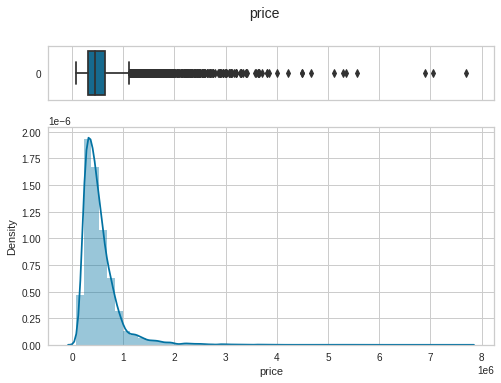

****************************************************************************************************
Evaluating "room_bed". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean        3.37084
std         0.93006
min         0.00000
25%         3.00000
50%         3.00000
75%         4.00000
max        33.00000
Name: room_bed, dtype: float64


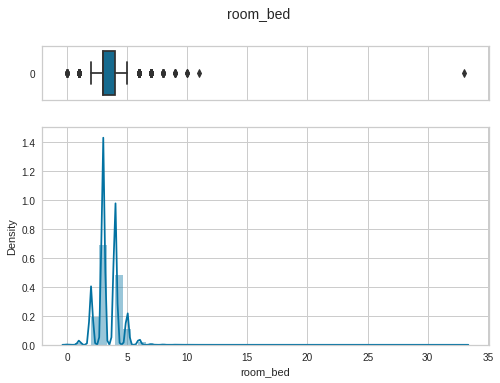

****************************************************************************************************
Evaluating "room_bath". This is stored as float64
NULL COUNT: 0
count   21613.00000
mean        2.11476
std         0.77016
min         0.00000
25%         1.75000
50%         2.25000
75%         2.50000
max         8.00000
Name: room_bath, dtype: float64


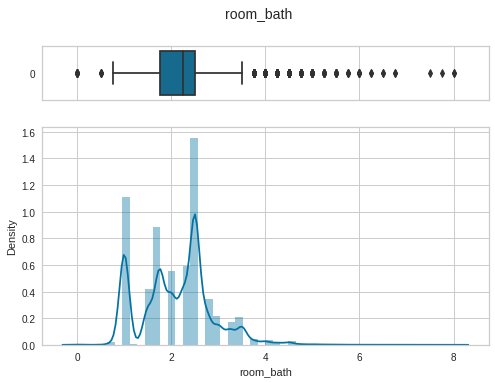

****************************************************************************************************
Evaluating "living_measure". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     2079.89974
std       918.44090
min       290.00000
25%      1427.00000
50%      1910.00000
75%      2550.00000
max     13540.00000
Name: living_measure, dtype: float64


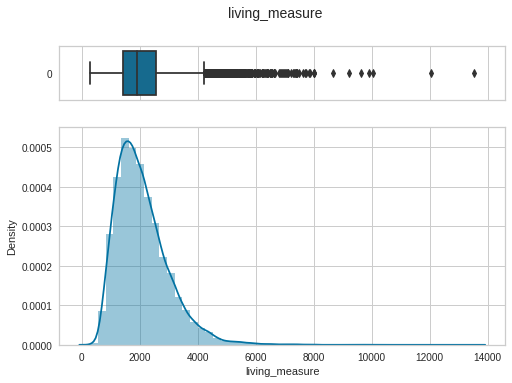

****************************************************************************************************
Evaluating "lot_measure". This is stored as int64
NULL COUNT: 0
count     21613.00000
mean      15106.96757
std       41420.51152
min         520.00000
25%        5040.00000
50%        7618.00000
75%       10688.00000
max     1651359.00000
Name: lot_measure, dtype: float64


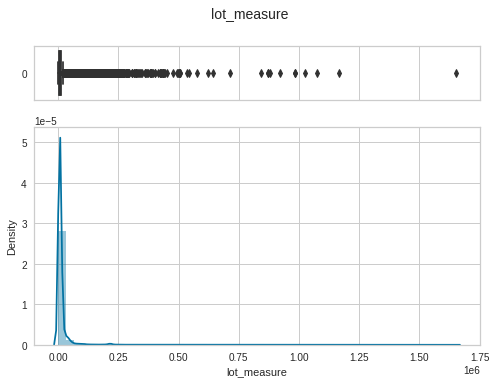

****************************************************************************************************
Evaluating "quality". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean        7.65687
std         1.17546
min         1.00000
25%         7.00000
50%         7.00000
75%         8.00000
max        13.00000
Name: quality, dtype: float64


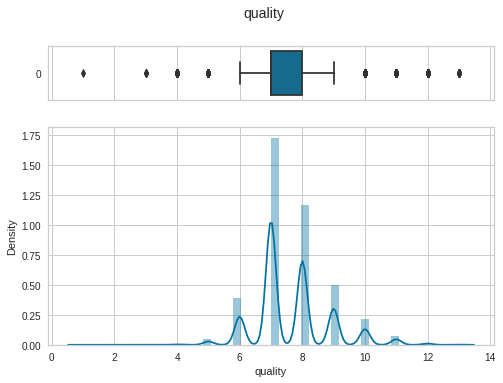

****************************************************************************************************
Evaluating "ceil_measure". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     1788.39069
std       828.09098
min       290.00000
25%      1190.00000
50%      1560.00000
75%      2210.00000
max      9410.00000
Name: ceil_measure, dtype: float64


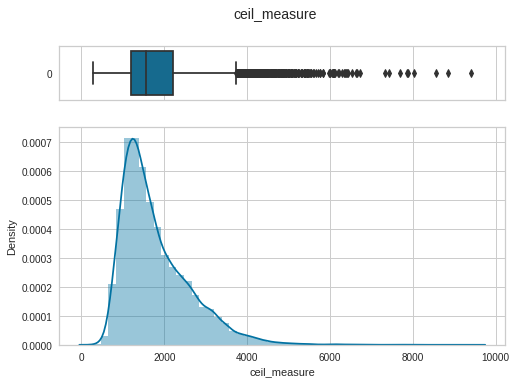

****************************************************************************************************
Evaluating "basement". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean      291.50905
std       442.57504
min         0.00000
25%         0.00000
50%         0.00000
75%       560.00000
max      4820.00000
Name: basement, dtype: float64


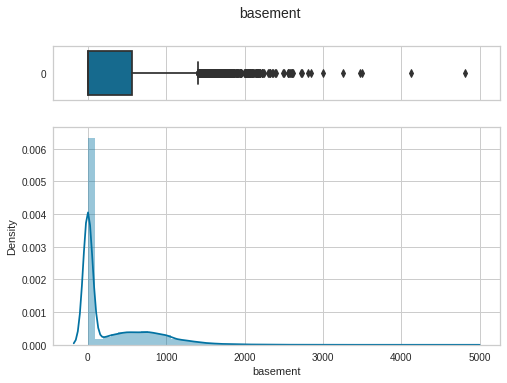

****************************************************************************************************
Evaluating "yr_built". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     1971.00514
std        29.37341
min      1900.00000
25%      1951.00000
50%      1975.00000
75%      1997.00000
max      2015.00000
Name: yr_built, dtype: float64


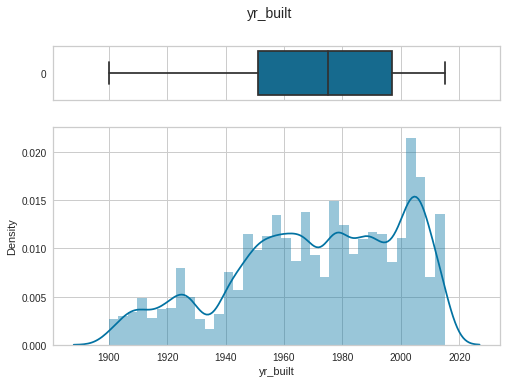

****************************************************************************************************
Evaluating "yr_renovated". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean       84.40226
std       401.67924
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      2015.00000
Name: yr_renovated, dtype: float64


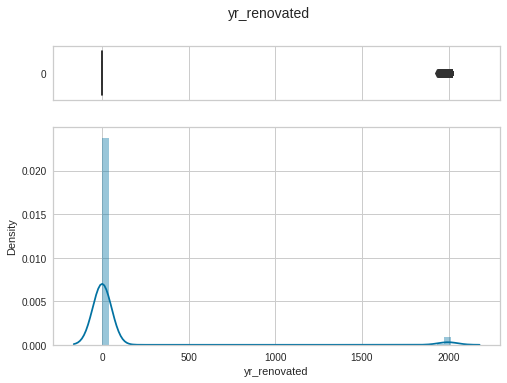

****************************************************************************************************
Evaluating "zipcode". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean    98077.93980
std        53.50503
min     98001.00000
25%     98033.00000
50%     98065.00000
75%     98118.00000
max     98199.00000
Name: zipcode, dtype: float64


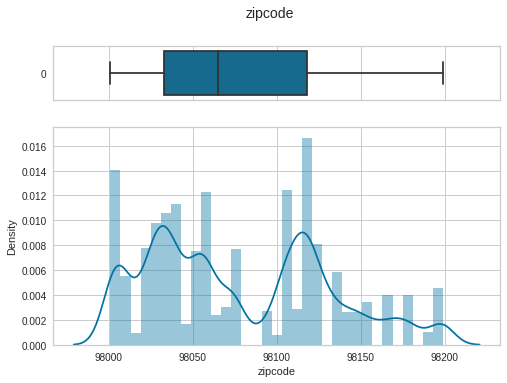

****************************************************************************************************
Evaluating "lat". This is stored as float64
NULL COUNT: 0
count   21613.00000
mean       47.56005
std         0.13856
min        47.15590
25%        47.47100
50%        47.57180
75%        47.67800
max        47.77760
Name: lat, dtype: float64


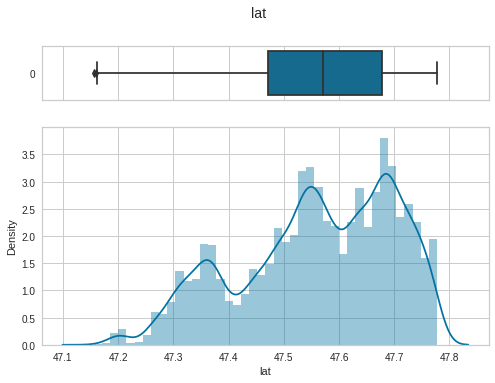

****************************************************************************************************
Evaluating "long". This is stored as float64
NULL COUNT: 0
count   21613.00000
mean     -122.21390
std         0.14083
min      -122.51900
25%      -122.32800
50%      -122.23000
75%      -122.12500
max      -121.31500
Name: long, dtype: float64


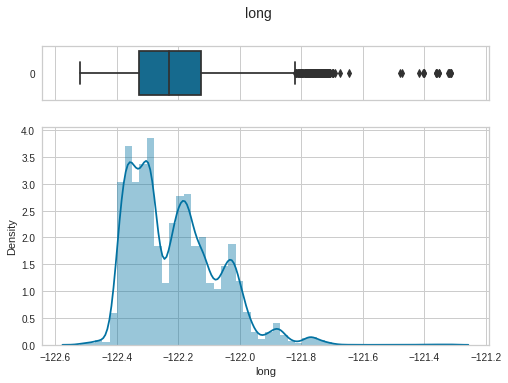

****************************************************************************************************
Evaluating "living_measure15". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     1986.55249
std       685.39130
min       399.00000
25%      1490.00000
50%      1840.00000
75%      2360.00000
max      6210.00000
Name: living_measure15, dtype: float64


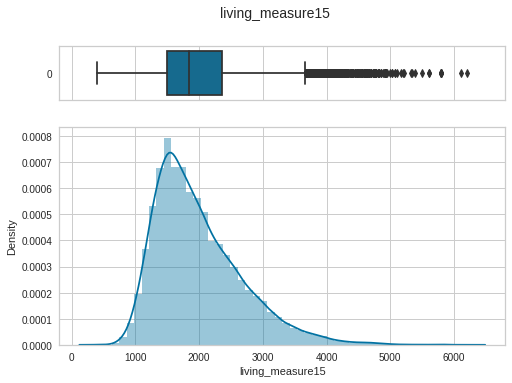

****************************************************************************************************
Evaluating "lot_measure15". This is stored as int64
NULL COUNT: 0
count    21613.00000
mean     12768.45565
std      27304.17963
min        651.00000
25%       5100.00000
50%       7620.00000
75%      10083.00000
max     871200.00000
Name: lot_measure15, dtype: float64


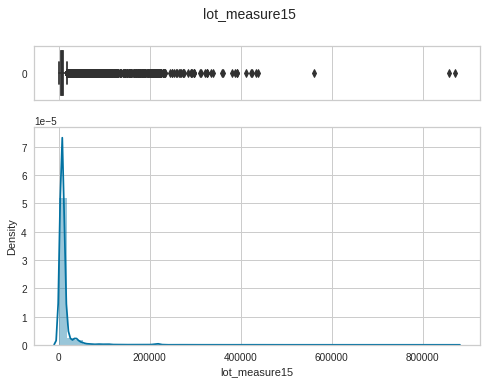

****************************************************************************************************
Evaluating "total_area". This is stored as int64
NULL COUNT: 0
count     21613.00000
mean      17186.86730
std       41589.08122
min        1423.00000
25%        7035.00000
50%        9575.00000
75%       13000.00000
max     1652659.00000
Name: total_area, dtype: float64


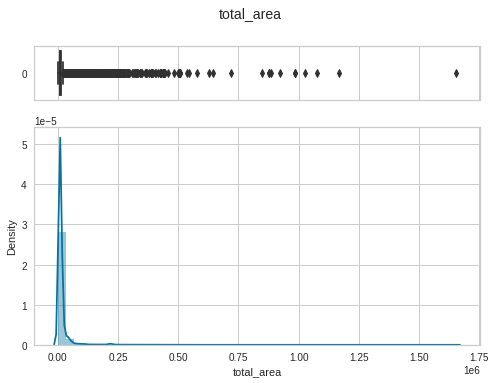

****************************************************************************************************


In [13]:
for c in numerical_like[2:]:
    explore_numerical(Dataset, c)
    print("*"*100)

In [14]:
 # Taking a look at the outlier point for column"room_bed'
    
Dataset[Dataset['room_bed']==33]

cid         dayhours   price  room_bed  room_bath  living_measure  \
750  2402100895  20140625T000000  640000        33    1.75000            1620   

     lot_measure    ceil  coast  sight  condition  quality  ceil_measure  \
750         6000 1.00000      0      0          5        7          1040   

     basement  yr_built  yr_renovated  zipcode      lat       long  \
750       580      1947             0    98103 47.68780 -122.33100   

     living_measure15  lot_measure15  furnished  total_area  
750              1330           4700          0        7620

In [15]:
Dataset[Dataset.basement==0].shape

(13126, 23)

**Calculating percentage -Almost 60% of houses are without basement**

In [16]:
Dataset[Dataset['yr_renovated']>0].shape

(914, 23)

**914 houses were renovated out of 21613 houses**

1.The **Price** is ranging from **75,000 to 77,00,000** and distribution is **right-skewed**.
2.The value of 33 seems to be outlier we need to check the data point before imputing the same
3.Majority of the properties have **bathroom** in the range of 1.0 to 2.5
4.Most properties have **quality** rating between 6 to 10
5.Proprties of **ceil_measure** is hihly skewed towards the right
6.For **Basement** We can see 2 gaussians, which tells us there are propeties which don't have basements and some have the basements
7.**Yr-Built** ranging from 1900 to 2014 in ascending trend

**The above univariate analysis of numeric columns shows that ther are multiple features that have outliers. Lets treat them later in the model**

We will try to handle this or drop for improvng the accuracy of the Model during outlier treatment

Evaluating "ceil". This is stored as float64
NULL COUNT: 0


Value  Count  Percentage
  1.00000  10680    49.40000
  2.00000   8241    38.10000
  1.50000   1910     8.80000
  3.00000    613     2.80000
  2.50000    161     0.70000
  3.50000      8     0.00000

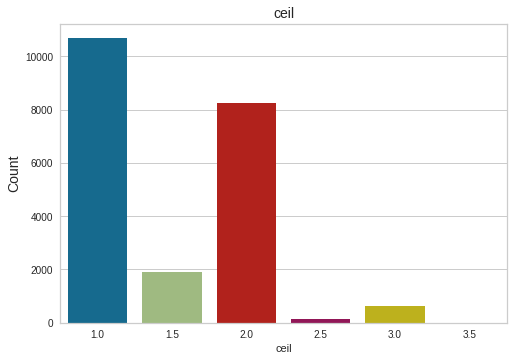

****************************************************************************************************
Evaluating "coast". This is stored as int64
NULL COUNT: 0


Value  Count  Percentage
       0  21450    99.20000
       1    163     0.80000

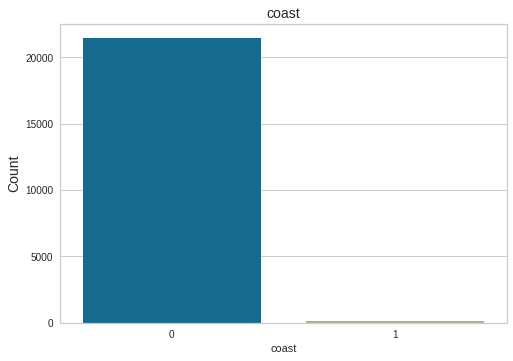

****************************************************************************************************
Evaluating "sight". This is stored as int64
NULL COUNT: 0


Value  Count  Percentage
       0  19489    90.20000
       2    963     4.50000
       3    510     2.40000
       1    332     1.50000
       4    319     1.50000

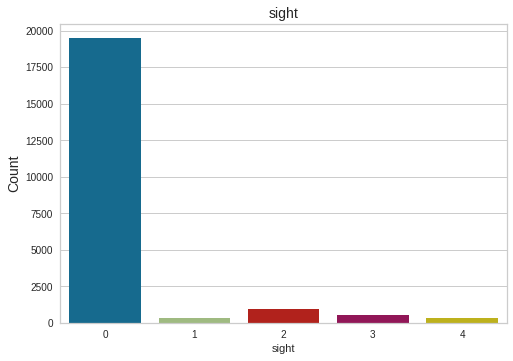

****************************************************************************************************
Evaluating "condition". This is stored as int64
NULL COUNT: 0


Value  Count  Percentage
       3  14031    64.90000
       4   5679    26.30000
       5   1701     7.90000
       2    172     0.80000
       1     30     0.10000

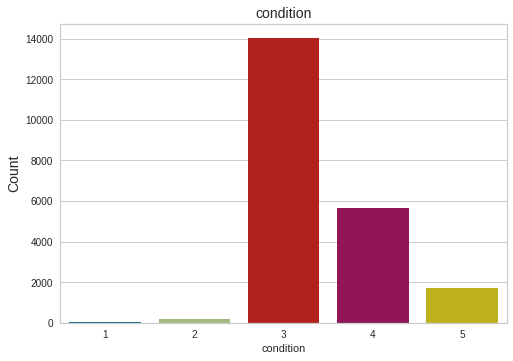

****************************************************************************************************
Evaluating "furnished". This is stored as int64
NULL COUNT: 0


Value  Count  Percentage
       0  17362    80.30000
       1   4251    19.70000

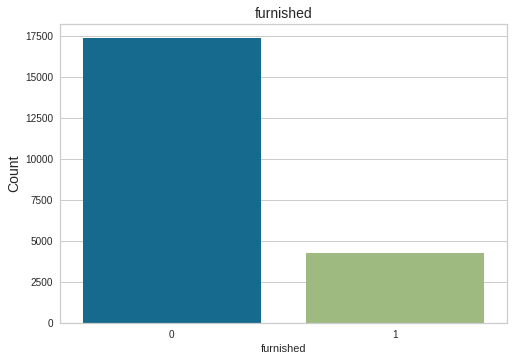

****************************************************************************************************


In [17]:
for c in categorical_like:
    explore_categorical(Dataset, c)
    print("*"*100)

**1.#Feature: ceil -We can see, most houses have Single  floor followed  by 2 floors
  2.#Feature :Sight - most sights have not been viewed
  3.#Feature :condition - Overall most houses are rated as 3 and 4 for its condition
  4 Furnished : Most properties are not furnished**


### Analyzing the feature columns cid and dayhours

In [18]:
# Cid column 
ID_count=Dataset.cid.value_counts()
ID_count[ID_count>1].shape

(176,)

**We can see that there are 176 houses  that are sold more than once . We figured it because we noticed that Cid is appearing many times in the data**


In [19]:
# Function to convert dayhours to date time object


Dataset.dayhours=Dataset.dayhours.str.replace('T000000', "")

Dataset.dayhours=pd.to_datetime(Dataset.dayhours,format='%Y%m%d')


In [20]:
# Taking a copy of the original dataset
Dataset_original=Dataset.copy()

# Splitting Month here for Analysis purpose
Dataset['month_year']=Dataset['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
Dataset['month_year'].head()

0    November-2014
1    December-2014
2       April-2015
3         May-2014
4       April-2015
Name: month_year, dtype: object

**IDENTIFYING MOST SOLD HOUSE BASED ON MONTH**

In [21]:
Dataset['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

We can see, most houses sold in April and July month

**IDENTIFYING MOST COMMON SOLD HOUSE TYPE**

Text(0, 0.5, 'Count')

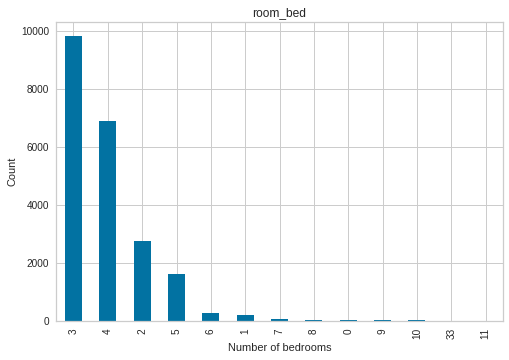

In [22]:
Dataset.room_bed.value_counts().plot(kind='bar')
plt.title('room_bed')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

**From the above plot its is evident that the highest selling house type is that which has 3 bedrooms and the next highest is 4**

How is the Info helpful?

Based on the above data a builder can build houses that are bought commonly (3 bedroom) which could possibly attract the higher middle calss and high class people.

# BIVARIATE ANALYSIS

\**IDENTIFYING THE COMMON LOCATION WHERE MOST HOUSES ARE BUILT**

<Figure size 720x720 with 0 Axes>

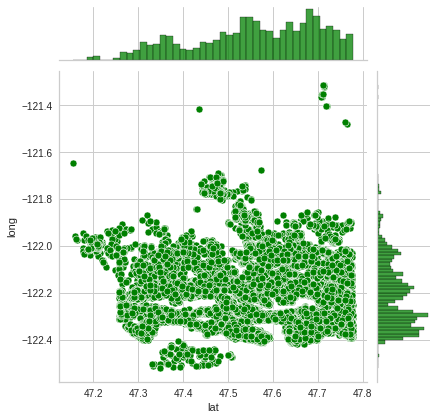

In [23]:
plt.figure(figsize=(10,10))
sns.jointplot(x="lat", y="long", data=Dataset, color ='green')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**From the above plot its is evident that most of the houses are localted beween a latitude of 47.7 and 47.8 , Longitude of 122.2 to -122.4**

How is the Info helpful?

Most of the buyers preferring these locations 

**Analysis target "Price" with other features affecting it**

Text(0.5, 1.0, 'Price vs Square feet')

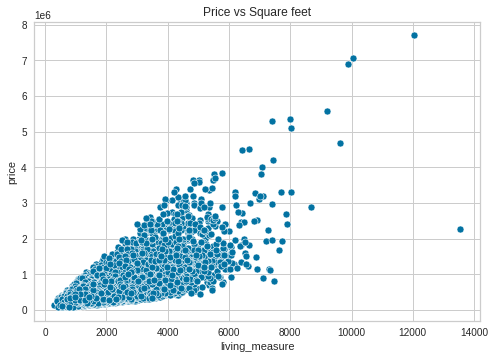

In [24]:
sns.scatterplot(y=Dataset['price'], x=Dataset['living_measure'],);
plt.title("Price vs Square feet")

Text(0.5, 1.0, 'Price vs lot measure')

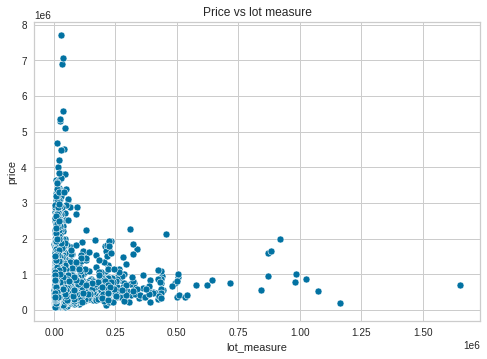

In [25]:
sns.scatterplot(y=Dataset['price'], x=Dataset['lot_measure'],);
plt.title("Price vs lot measure")

**1.Above scatter plot indicates that there is a linear relationship b/w Price and the living area**
**2. Larger the Livng area ,higer the price is.**
**3.We do see some outliers as well where the larger property is sold for lesser Price. This could be some one off issue or wrong data enetered.**
**4.Lot measure has no relation with the Price trend**


Text(0.5, 1.0, 'Prive vs Longitude')

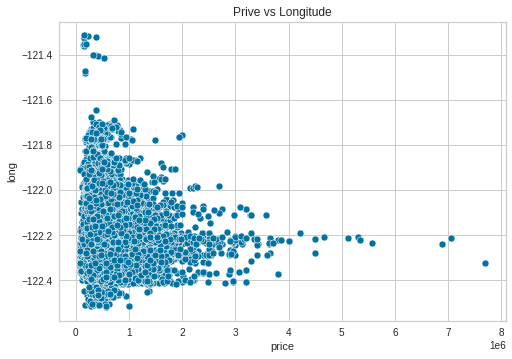

In [26]:
sns.scatterplot(x=Dataset['price'], y=Dataset['long'],);
plt.title("Prive vs Longitude")

**Above Scatter plot between Price and longitude tells us interesting observation that -122.2 to -122.4 sells houses at much higher amount.**

Analyzing 'month_year' vs Price using **Factor plots**


mean       median  size
month_year                                    
April-2015     561933.46302 476500.00000  2231
August-2014    536527.03969 442100.00000  1940
December-2014  524602.89327 432500.00000  1471
February-2015  507919.60320 425545.00000  1250
January-2015   525963.25153 438500.00000   978
July-2014      544892.16101 465000.00000  2211
June-2014      558123.73624 465000.00000  2180
March-2015     544057.68320 450000.00000  1875
May-2014       548166.60011 465000.00000  1768
May-2015       558193.09598 455000.00000   646
November-2014  522058.86180 435000.00000  1411
October-2014   539127.47764 446900.00000  1878
September-2014 529315.86809 450000.00000  1774

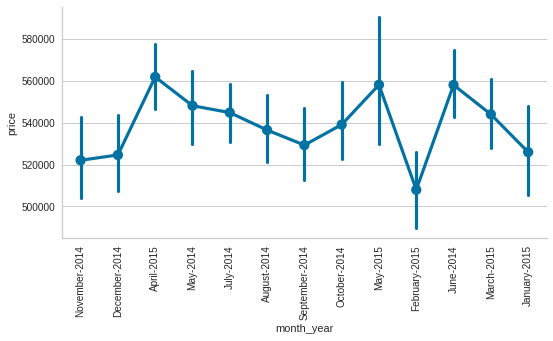

In [27]:
sns.factorplot(x='month_year',y='price',data=Dataset, size=4, aspect=2)
plt.xticks(rotation=90)
#groupby
Dataset.groupby('month_year')['price'].agg(['mean','median','size'])

From the Factor plot above , we can see that the mean price of the houses are high during March,April, May compared to September, October, November,December period. 

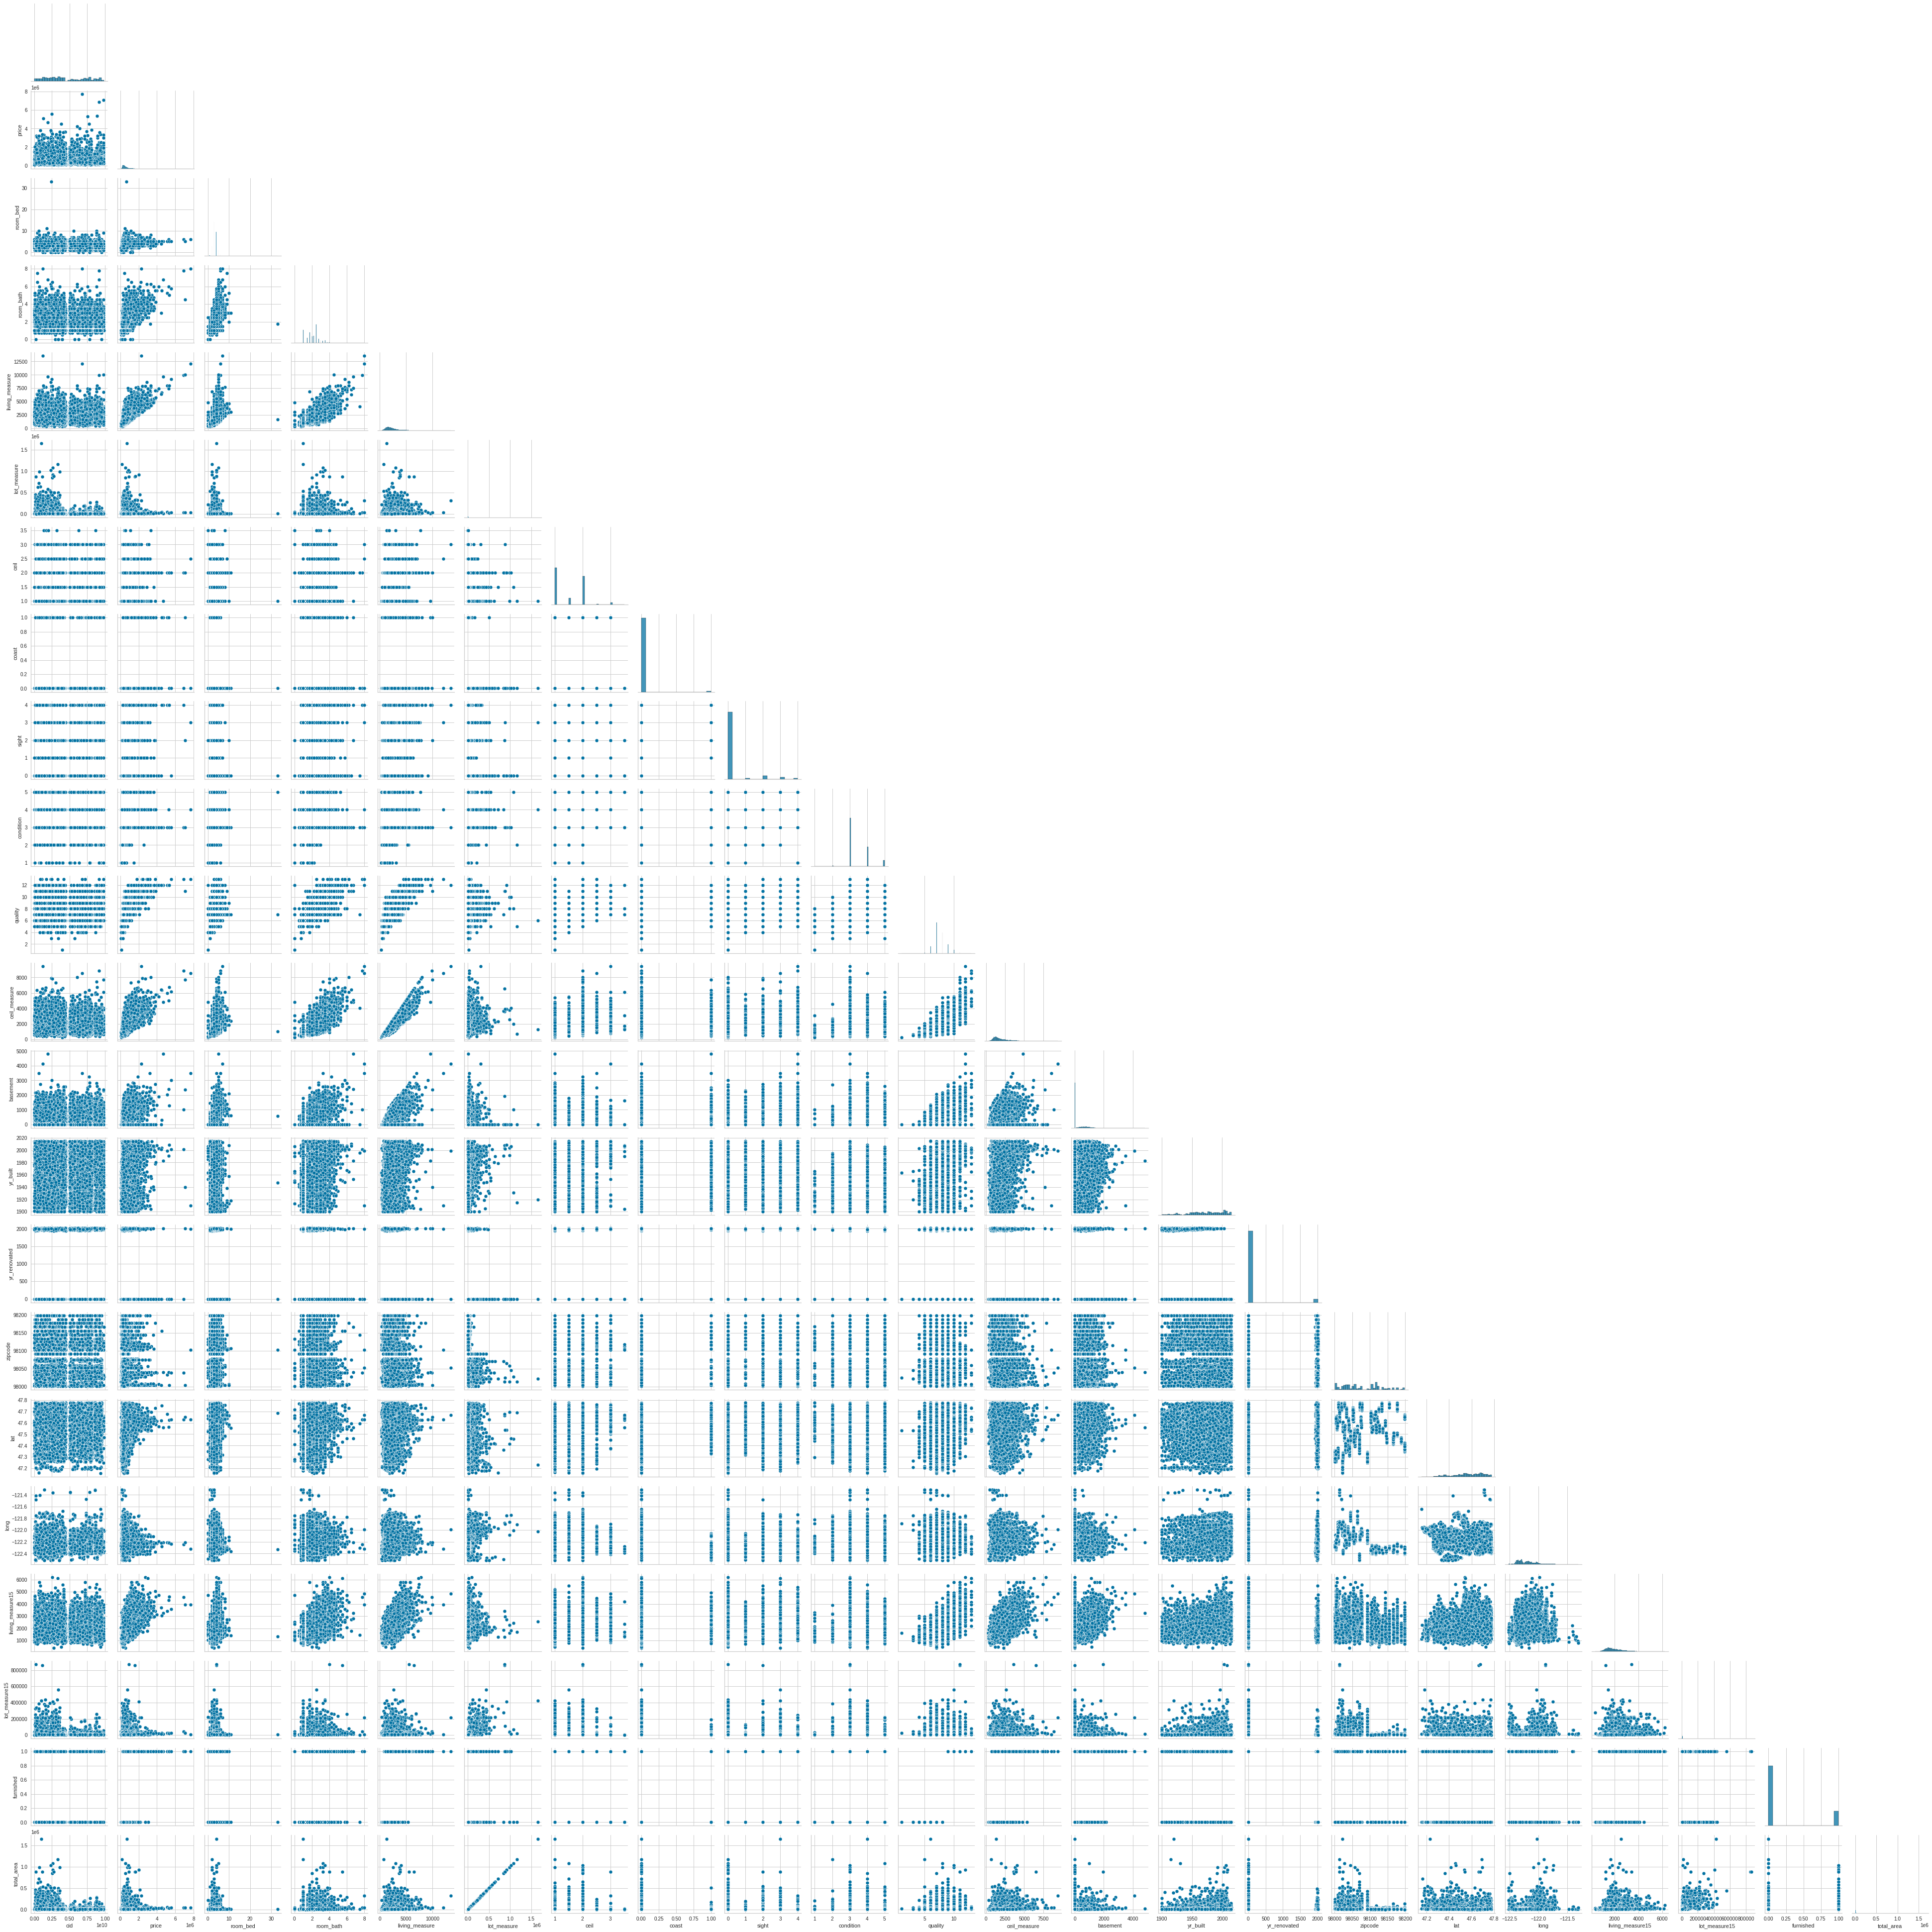

In [28]:
sns.pairplot(Dataset, corner=True)


<ol>
    <li><b>CID:</b> House ID/Property ID.Not used for analysis</li>
    <li><b>Dayhours:</b> 5 factor analysis is reflecting for this column</li>
    <li><b>price:</b> Our taget column value is in 75k - 7700k range. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>room_bed:</b> Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's <b>slightly Right-Skewed.</b></li>
    <li><b>room_bath:</b> Number of bathrooms range from 0 - 8. As Mean slightly &lt; Median, it's <b>slightly Left-Skewed</b>.</li>
    <li><b>living_measure:</b> Square footage of house range from 290 - 13,540. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure:</b> Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's <b>Hightly Right-Skewed</b>.</li>
    <li><b>ceil:</b> Number of floors range from 1 - 3.5 As Mean ~ Median, it's <b>almost Normal Distributed</b>.</li>
    <li><b>coast:</b> As this value represent whether house has waterfront view or not. It's <b>categorical column</b>. From above analysis we got know, very few houses has waterfront view.</li>
    <li><b>sight:</b> Value ranges from 0 - 4. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>condition:</b> Represents rating of house which ranges from 1 - 5. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>quality:</b> Representign grade given to house which range from 1 - 13. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>ceil_measure:</b> Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>basement:</b> Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>yr_built:</b> House built year ranges from 1900 - 2015. As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>yr_renovated:</b> House renovation year only 2015. So this column can be used as <b>Categorical Variable</b> for knowing whether house is renovated or not.</li>
    <li><b>zipcode:</b> House ZipCode ranges from 98001 - 98199. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lat:</b> Lattitude ranges from 47.1559 - 47.7776 As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>long:</b> Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>living_measure15:</b> Value ragnes from 399 to 6,210. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure15:</b> Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>furnished:</b> Representing whether house is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>total_area</b> Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's <b>Highly Right-Skewed</b></li>
</ol>

From above analysis we got to know,

Most columns distribution is Right-Skewed and only few features are Left-Skewed (like room_bath, yr_built, lat).

We have columns which are Categorical in nature are -> coast, yr_renovated, furnished

In [29]:
# let's see corelatoin between the different features
Dataset_corr = Dataset.corr(method ='pearson')
Dataset_corr

cid    price  room_bed  room_bath  living_measure  \
cid               1.00000 -0.01680   0.00129    0.00516        -0.01226   
price            -0.01680  1.00000   0.30834    0.52513         0.70204   
room_bed          0.00129  0.30834   1.00000    0.51588         0.57667   
room_bath         0.00516  0.52513   0.51588    1.00000         0.75467   
living_measure   -0.01226  0.70204   0.57667    0.75467         1.00000   
lot_measure      -0.13211  0.08966   0.03170    0.08774         0.17283   
ceil              0.01853  0.25679   0.17543    0.50065         0.35395   
coast            -0.00272  0.26633  -0.00658    0.06374         0.10382   
sight             0.01159  0.39735   0.07953    0.18774         0.28461   
condition        -0.02378  0.03639   0.02847   -0.12498        -0.05875   
quality           0.00813  0.66746   0.35697    0.66498         0.76270   
ceil_measure     -0.01084  0.60557   0.47760    0.68534         0.87660   
basement         -0.00515  0.32384   0.30309    0.28377         0.43504   
yr_built          0.02138  0.05398   0.15418    0.50602         0.31805   
yr_renovated     -0.01691  0.12644   0.01884    0.05074         0.05536   
zipcode          -0.00822 -0.05317  -0.15267   -0.20387        -0.19943   
lat              -0.00189  0.30692  -0.00893    0.02457         0.05253   
long              0.02080  0.02157   0.12947    0.22304         0.24022   
living_measure15 -0.00290  0.58537   0.39164    0.56863         0.75642   
lot_measure15    -0.13880  0.08246   0.02924    0.08718         0.18329   
furnished        -0.01001  0.56599   0.25927    0.48492         0.63295   
total_area       -0.13184  0.10480   0.04431    0.10405         0.19421   

                  lot_measure     ceil    coast    sight  condition  quality  \
cid                  -0.13211  0.01853 -0.00272  0.01159   -0.02378  0.00813   
price                 0.08966  0.25679  0.26633  0.39735    0.03639  0.66746   
room_bed              0.03170  0.17543 -0.00658  0.07953    0.02847  0.35697   
room_bath             0.08774  0.50065  0.06374  0.18774   -0.12498  0.66498   
living_measure        0.17283  0.35395  0.10382  0.28461   -0.05875  0.76270   
lot_measure           1.00000 -0.00520  0.02160  0.07471   -0.00896  0.11362   
ceil                 -0.00520  1.00000  0.02370  0.02944   -0.26377  0.45818   
coast                 0.02160  0.02370  1.00000  0.40186    0.01665  0.08277   
sight                 0.07471  0.02944  0.40186  1.00000    0.04599  0.25132   
condition            -0.00896 -0.26377  0.01665  0.04599    1.00000 -0.14467   
quality               0.11362  0.45818  0.08277  0.25132   -0.14467  1.00000   
ceil_measure          0.18351  0.52388  0.07207  0.16765   -0.15821  0.75592   
basement              0.01529 -0.24570  0.08059  0.27695    0.17410  0.16839   
yr_built              0.05308  0.48932 -0.02616 -0.05344   -0.36142  0.44696   
yr_renovated          0.00764  0.00634  0.09288  0.10392   -0.06062  0.01441   
zipcode              -0.12957 -0.05912  0.03028  0.08483    0.00303 -0.18486   
lat                  -0.08568  0.04961 -0.01427  0.00616   -0.01494  0.11408   
long                  0.22952  0.12542 -0.04191 -0.07840   -0.10650  0.19837   
living_measure15      0.14461  0.27989  0.08646  0.28044   -0.09282  0.71320   
lot_measure15         0.71856 -0.01127  0.03070  0.07257   -0.00341  0.11925   
furnished             0.11888  0.34775  0.06988  0.22025   -0.12190  0.78862   
total_area            0.99976  0.00264  0.02381  0.08069   -0.01022  0.13000   

                  ceil_measure  basement  yr_built  yr_renovated  zipcode  \
cid                   -0.01084  -0.00515   0.02138      -0.01691 -0.00822   
price                  0.60557   0.32384   0.05398       0.12644 -0.05317   
room_bed               0.47760   0.30309   0.15418       0.01884 -0.15267   
room_bath              0.68534   0.28377   0.50602       0.05074 -0.20387   
living_measure         0.87660   0.43504   0.31805       0.05536 -0.19

We have linear relationships in below featues as we got to know from above matrix

<ol>
    <li><b>price</b>: room_bath, living_measure, quality, living_measure15, furnished</li>
    <li><b>living_measure</b>: price, room_bath. So we can consider dropping 'room_bath' variable.</li>
    <li><b>quality</b>: price, room_bath, living_measure</li>
    <li><b>ceil_measure</b>: price, room_bath, living_measure, quality</li>
    <li><b>living_measure15</b>: price, living_measure, quality. So we can  consider dropping living_measure15 as well. As it's giving same info as living_measure.</li>
    <li><b>lot_measure15</b>: lot_measure. Therefore, we can consider dropping lot_measure15, as it's giving same info.</li>
    <li><b>furnished</b>: quality</li>
    <li><b>total_area</b>: lot_measure, lot_measure15. Therefore, we can consider dropping total_area feature as well. As it's giving same info as lot_measure.</li>
</ol>

We can plot heatmap and can easily confirm our above findings

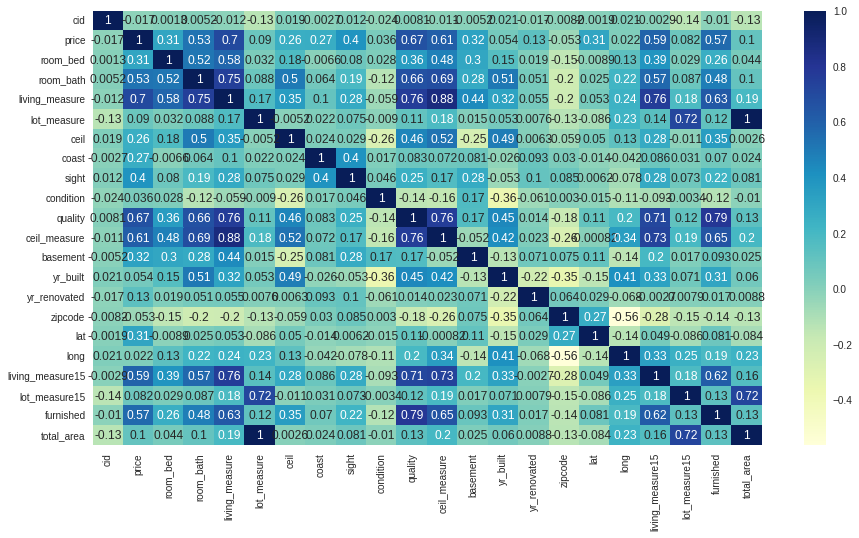

In [30]:
# Heat Map:

# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(Dataset_corr,cmap="YlGnBu",annot=True)

### Multicollinearity 

In [31]:
upper = Dataset_corr.where(np.triu(np.ones(Dataset_corr.shape), k=1).astype(np.bool))
to_drop = [i for i in upper.columns if any(upper[i] > 0.70)]
to_drop

['living_measure',
 'quality',
 'ceil_measure',
 'living_measure15',
 'lot_measure15',
 'furnished',
 'total_area']

#### Some of the above features having high correlation with each other so we will try dropping them at Data processing stage

In [32]:
# Printing the correlation value for the above columns :
for x in to_drop:
    print(x,':')
    print(Dataset_corr[x])
    print("*****************************\n")

living_measure :
cid                -0.01226
price               0.70204
room_bed            0.57667
room_bath           0.75467
living_measure      1.00000
lot_measure         0.17283
ceil                0.35395
coast               0.10382
sight               0.28461
condition          -0.05875
quality             0.76270
ceil_measure        0.87660
basement            0.43504
yr_built            0.31805
yr_renovated        0.05536
zipcode            -0.19943
lat                 0.05253
long                0.24022
living_measure15    0.75642
lot_measure15       0.18329
furnished           0.63295
total_area          0.19421
Name: living_measure, dtype: float64
*****************************

quality :
cid                 0.00813
price               0.66746
room_bed            0.35697
room_bath           0.66498
living_measure      0.76270
lot_measure         0.11362
ceil                0.45818
coast               0.08277
sight               0.25132
condition          -0.14467
quality  

In [33]:
#For current working directory
cwd = os.getcwd()

In [34]:
## Need to add file USA ZipCodes_1.xlsx to current working directory to access this data
Zipcodesxl=pd.read_csv('uszips.csv')
Zipcodesxl.head()

zipcode       city county_name
0      601   Adjuntas    Adjuntas
1      602     Aguada      Aguada
2      603  Aguadilla   Aguadilla
3      606    Maricao     Maricao
4      610     Anasco      Añasco

In [35]:
Dataset=Dataset.merge(Zipcodesxl,how='left',on='zipcode')


In [36]:
Dataset.shape
Dataset.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4    3.25000            3020   
1  8731981640 2014-12-04  277500         4    2.50000            2550   
2  5104530220 2015-04-20  404000         3    2.50000            2370   
3  6145600285 2014-05-29  300000         2    1.00000             820   
4  8924100111 2015-04-24  699000         2    1.50000            1400   

   lot_measure    ceil  coast  sight  condition  quality  ceil_measure  \
0        13457 1.00000      0      0          5        9          3020   
1         7500 1.00000      0      0          3        8          1750   
2         4324 2.00000      0      0          3        8          2370   
3         3844 1.00000      0      0          4        6           820   
4         4050 1.00000      0      0          4        8          1400   

   basement  yr_built  yr_renovated  zipcode      lat       long  \
0         0      1956             0    98133 47.71740 -122.33600   
1       800      1976             0    98023 47.31650 -122.38600   
2         0      2006             0    98038 47.35150 -121.99900   
3         0      1916             0    98133 47.70490 -122.34900   
4         0      1954             0    98115 47.67680 -122.26900   

   living_measure15  lot_measure15  furnished  total_area     month_year  \
0              2120           7553          1       16477  November-2014   
1              2260           8800          0       10050  December-2014   
2              2370           4348          0        6694     April-2015   
3              1520           3844          0        4664       May-2014   
4              1900           5940          0        5450     April-2015   

           city county_name  
0       Seattle        King  
1   Federal Way        King  
2  Maple Valley        King  
3       Seattle        King  
4       Seattle        King

In [37]:
## Reading the WSDOT shape file from the drive
usa = gpd.read_file('WSDOT_-_City_Limits/WSDOT_-_City_Limits.shp')
usa.head()

OBJECTID        CityName CountySeat  CityGNISPl  LastUpdate CountyFIPS  \
0      8325        Aberdeen         no     2409655  2018-08-31      53027   
1      8326  Airway Heights         no     2409668  2012-08-31      53063   
2      8327          Albion         no     2412345        None      53075   
3      8328          Algona         no     2409680  2013-08-31      53033   
4      8329          Almira         no     2412352  2014-02-28      53043   

  MajorCity CityFIPSLo OFMCityCod                                GlobalID  \
0       yes    5300100       0005  {47788AF8-9B9E-4F75-88A4-426B749E21C3}   
1        no    5300905       0010  {630CB3CF-FE41-48A6-9AB8-F780CC4000BF}   
2        no    5301010       0015  {A9E6CED5-4EA5-43D7-B04E-5D976C39396D}   
3        no    5301290       0020  {C330E743-AA73-4F77-BBB5-A663A2551F07}   
4        no    5301500       0025  {88A7F9CA-66BD-4374-86FD-959FAA0C90EF}   

       SHAPESTAre   SHAPESTLen  \
0 350866352.25527 148153.71439   
1 167832563.69466  70256.61895   
2  10949178.54047  17913.58194   
3  37220383.40779  33737.44902   
4  14172147.19954  27368.46568   

                                            geometry  
0  MULTIPOLYGON (((-123.82066 46.94810, -123.8260...  
1  POLYGON ((-117.56128 47.66762, -117.56115 47.6...  
2  POLYGON ((-117.25327 46.78603, -117.25350 46.7...  
3  POLYGON ((-122.23986 47.29365, -122.24502 47.2...  
4  POLYGON ((-118.94229 47.71770, -118.94216 47.7...

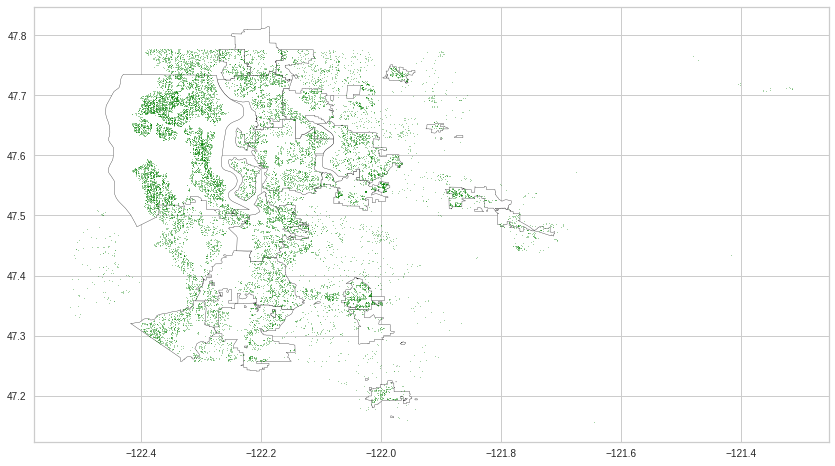

<Figure size 1080x1080 with 0 Axes>

In [38]:

gdf = gpd.GeoDataFrame(
    Dataset,geometry = [Point(xy) for xy in zip(Dataset['long'], Dataset['lat'])])
#We can now plot our ``GeoDataFrame``
ax=usa[usa.CityName.isin(Dataset.city.unique())].plot(
    color='white', edgecolor='black',figsize=(20,8))
plt.figure(figsize=(15,15))
gdf.plot(ax=ax, color='green', marker='o',markersize=0.1)

** IDENTIFYING THE COMMON CITY WHERE MOST HOUSES ARE BUILT**

In [39]:
Dataset.city.value_counts()

Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: city, dtype: int64

** We can see that Seattle is the state where more houses are built and least in Medina** 

In [40]:
Dataset.dtypes

cid                          int64
dayhours            datetime64[ns]
price                        int64
room_bed                     int64
room_bath                  float64
living_measure               int64
lot_measure                  int64
ceil                       float64
coast                        int64
sight                        int64
condition                    int64
quality                      int64
ceil_measure                 int64
basement                     int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
living_measure15             int64
lot_measure15                int64
furnished                    int64
total_area                   int64
month_year                  object
city                        object
county_name                 object
geometry                  geometry
dtype: object

In [41]:
# Creating a new variable which gives the ratio of living measure and total area called 'Houseland' ratio
Dataset["HouseLandRatio"]=np.round((Dataset['living_measure']/Dataset['total_area']),2)*100
Dataset["HouseLandRatio"].head()

0   18.00000
1   25.00000
2   35.00000
3   18.00000
4   26.00000
Name: HouseLandRatio, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


mean        median  size
yr_renovated                                  
1934          459950.00000  459950.00000     1
1940          378400.00000  378400.00000     2
1944          521000.00000  521000.00000     1
1945          398666.66667  375000.00000     3
1946          351137.50000  351137.50000     2
1948          410000.00000  410000.00000     1
1950          291450.00000  291450.00000     2
1951          276000.00000  276000.00000     1
1953          245816.66667  247500.00000     3
1954          900000.00000  900000.00000     1
1955          442166.66667  399000.00000     3
1956          930666.66667 1140000.00000     3
1957          291533.33333  249900.00000     3
1958          559576.00000  397380.00000     5
1959          397500.00000  397500.00000     1
1960          477175.00000  299350.00000     4
1962          615000.00000  615000.00000     2
1963          497712.50000  402500.00000     4
1964          356720.00000  325000.00000     5
1965          782200.00000  580000.00000     5
1967          268600.00000  268600.00000     2
1968          483512.50000  425000.00000     8
1969          529125.00000  555750.00000     4
1970          523044.44444  450000.00000     9
1971          418277.50000  418277.50000     2
1972          619750.00000  522000.00000     4
1973          417200.00000  440000.00000     5
1974          402500.00000  310000.00000     3
1975          505250.00000  521750.00000     6
1976          401666.66667  335000.00000     3
1977          605043.75000  487000.00000     8
1978          469250.00000  498500.00000     6
1979          705490.00000  605450.00000    10
1980          753454.54545  550000.00000    11
1981          402510.60000  299950.00000     5
1982          786792.72727  554820.00000    11
1983          537477.77778  412500.00000    18
1984          607944.44444  493000.00000    18
1985          705817.64706  529000.00000    17
1986          623058.23529  520000.00000    17
1987         1206777.77778  624000.00000    18
1988          722760.00000  588000.00000    15
1989          639788.63636  560000.00000    22
1990          749120.00000  730000.00000    25
1991          965045.00000  792500.00000    20
1992          696794.11765  599000.00000    17
1993          848003.15789  805000.00000    19
1994          943026.52632  780000.00000    19
1995          805523.12500  536475.00000    16
1996          749663.33333  710000.00000    15
1997          620396.00000  569950.00000    15
1998          773731.57895  526000.00000    19
1999         1030705.88235  840000.00000    17
2000          809084.28571  755000.00000    35
2001         1089489.47368  675000.00000    19
2002         1216497.72727  890000.00000    22
2003          992305.55556  767500.00000    36
2004          782076.92308  721250.00000    26
2005          815195.71429  744000.00000    35
2006          789039.58333  654050.00000    24
2007          838922.14286  797000.00000    35
2008         1034498.88889  801500.00000    18
2009          900682.36364  521000.00000    22
2010          992669.44444  845000.00000    18
2011          607496.15385  577000.00000    13
2012          625181.81818  515000.00000    11
2013          664960.81081  560000.00000    37
2014          655030.09890  575000.00000    91
2015          659156.25000  651000.00000    16

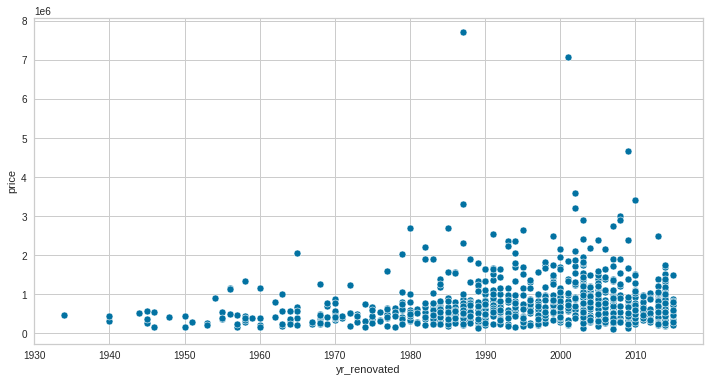

In [42]:
### Analyzing Bivariate for Feature: yr_renovated
plt.figure(figsize=(12, 6))
x=Dataset[Dataset['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
#groupby
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])


We can see most of the houses renovated after 1980. Lets create new categorical variable 'Has_been_renovated' 

In [43]:
# Creating another variable called 'Has_been_renovated'-- We do this because the renovated houses are sold at higher prices

def create_renovated_feature(series):
    if series == 0:
        return 0
    elif series > 0:
        return 1
    
Dataset['has_renovated'] = Dataset['yr_renovated'].apply(create_renovated_feature)


In [44]:
Dataset['has_renovated'].value_counts()

0    20699
1      914
Name: has_renovated, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


price                     HouseLandRatio                
                      mean       median   size           mean   median   size
has_renovated                                                                
0             530447.95860 448000.00000  20699       22.06706 20.00000  20699
1             760628.77790 600000.00000    914       22.29650 21.00000    914

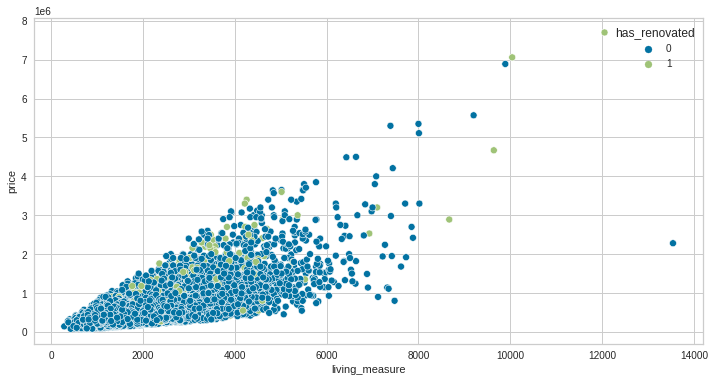

In [45]:
# Lets plot the new created'has been renovated' variable with respect to price and HouseLandRatio to see if we find something interesting

plt.figure(figsize=(12, 6))
print(sns.scatterplot(Dataset['living_measure'],Dataset['price'],hue=Dataset['has_renovated']))
#groupby
Dataset.groupby(['has_renovated'])['price','HouseLandRatio'].agg(['mean','median','size'])

Above Plot clearly shows that Renovated properties have higher price than others with same living measure space.

In [46]:
# Creating another variable called 'Has_basement'-- We do this to check the property with more basements sold at higher prices

def create_basement_feature(series):
    if series == 0:
        return 0
    elif series > 0:
        return 1
    
Dataset['has_basement'] = Dataset['basement'].apply(create_basement_feature)

price                     living_measure                  
                     mean       median   size           mean     median   size
has_basement                                                                  
0            486945.39479 411500.00000  13126     1928.87963 1740.00000  13126
1            622518.17438 515000.00000   8487     2313.46754 2100.00000   8487

<Figure size 864x432 with 0 Axes>

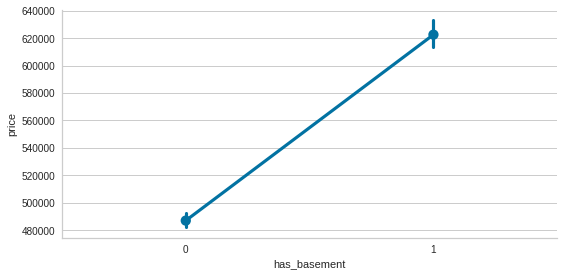

In [47]:
 # Lets plot the new created'has_ basement' variable with respect to price and sqft to see if we find something interesting

plt.figure(figsize=(12, 6))
print(sns.factorplot(x='has_basement',y='price',data=Dataset, size = 4, aspect = 2))
#groupby
Dataset.groupby(['has_basement'])['price','living_measure'].agg(['mean','median','size'])

Above Plot clearly shows that houses with basement are sold at higher prices than those without the basement

#### DATA PROCESSING

In [48]:
# At the end of outlier treatment , taking a copy of this dataset.

Dataset_new=Dataset.copy()
Dataset_new.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4    3.25000            3020   
1  8731981640 2014-12-04  277500         4    2.50000            2550   
2  5104530220 2015-04-20  404000         3    2.50000            2370   
3  6145600285 2014-05-29  300000         2    1.00000             820   
4  8924100111 2015-04-24  699000         2    1.50000            1400   

   lot_measure    ceil  coast  sight  condition  quality  ceil_measure  \
0        13457 1.00000      0      0          5        9          3020   
1         7500 1.00000      0      0          3        8          1750   
2         4324 2.00000      0      0          3        8          2370   
3         3844 1.00000      0      0          4        6           820   
4         4050 1.00000      0      0          4        8          1400   

   basement  yr_built  yr_renovated  zipcode      lat       long  \
0         0      1956             0    98133 47.71740 -122.33600   
1       800      1976             0    98023 47.31650 -122.38600   
2         0      2006             0    98038 47.35150 -121.99900   
3         0      1916             0    98133 47.70490 -122.34900   
4         0      1954             0    98115 47.67680 -122.26900   

   living_measure15  lot_measure15  furnished  total_area     month_year  \
0              2120           7553          1       16477  November-2014   
1              2260           8800          0       10050  December-2014   
2              2370           4348          0        6694     April-2015   
3              1520           3844          0        4664       May-2014   
4              1900           5940          0        5450     April-2015   

           city county_name                     geometry  HouseLandRatio  \
0       Seattle        King  POINT (-122.33600 47.71740)        18.00000   
1   Federal Way        King  POINT (-122.38600 47.31650)        25.00000   
2  Maple Valley        King  POINT (-121.99900 47.35150)        35.00000   
3       Seattle        King  POINT (-122.34900 47.70490)        18.00000   
4       Seattle        King  POINT (-122.26900 47.67680)        26.00000   

   has_renovated  has_basement  
0              0             0  
1              0             1  
2              0             0  
3              0             0  
4              0             0

In [49]:
# to take the difference between when house built to current year

Dataset_new['yr_built_diff']=2022-Dataset_new['yr_built']

curr_time = pd.to_datetime("now")   # current date

# to take the difference between when house sold to current year

difference = (curr_time-Dataset_new['dayhours'])/np.timedelta64(1,'W')

Dataset_new['difference']=difference



# Dropping the variables that will not have any impact on our model evaluation

1. We are deleting Cid because its a integer value for just count package
2. we already converted dayhours into the difference between house sold to current date hence deleting dayhours and month_year
3. for yr_renovated we already took has_renovated feature 
4. we have lat and long for location of house hence we are deleting zipcode, country_name, geometry, city
5. we have updated values in living_measure15 and lot_measure15 hence we are deleting living_measure and lot_measure
6. We found that ceil_measure has same value as living_measure hence we are deleting that ceil_measure


In [50]:
Dataset_new[["ceil_measure",'living_measure']]

ceil_measure  living_measure
0              3020            3020
1              1750            2550
2              2370            2370
3               820             820
4              1400            1400
...             ...             ...
21608          2303            2303
21609          3490            3490
21610          2790            2790
21611          1440            1440
21612           970             970

[21613 rows x 2 columns]

In [51]:
#Dropping the feature not required in 1st Iteration
Dataset_final=Dataset_new.drop(['cid','dayhours','yr_renovated','zipcode','county_name','geometry','month_year','ceil_measure','city','has_basement','yr_built','living_measure','lot_measure','HouseLandRatio'],axis=1)

###Outliers Detection and Treatment

---



In [52]:
def outlier_report(df, cutoff_percent = 0):
    '''Receive a dataframe df, series or a numpy array.
     print column name, outlier count and percent of values that are outliers.
     cutoff_percent is the reporting cutoff. Columns with more than this many ouliers will be displayed.
     Default cutoff_percent is 0; the function returns all columns with even a single outlier.

    returns a list of column names (columns containing outliers)
    ''' 
    
    df = pd.DataFrame(df) # just to ensure we can process numpy arrays and pandas Series as well.

    if cutoff_percent == 0:
        cutoff_string = ''
    else:
        cutoff_string = f" more than {cutoff_percent} percent"    
  
    def outlier_counter(col):
        '''Count the outliers as per 1.5*IQR rule'''
        qL = col.quantile(0.25)
        qH = col.quantile(0.75)
        iqr = qH-qL
        whiskL =  qL-1.5*iqr
        whiskH =  qH+1.5*iqr
        low  = (col < whiskL).sum()
        high = (col > whiskH).sum()
        total = low+high
        return total
 
    cols, counts, percents = [],[],[]
    length = len(df)
    
    for c in df:
        if (df[c].dtypes != 'object'):
            count  = outlier_counter(df[c])
            percent = count*100/length
        if percent > cutoff_percent:
            cols.append(c)
            counts.append(count)
            percents.append(percent)
  
    report_df = pd.DataFrame()
    if len(counts)>0:
      print(f'OUTLIER REPORT\nColumns with{cutoff_string} outliers')
      report_df['Column Name'] = cols
      report_df['Outlier Count'] = counts
      report_df['Outlier Percent'] = percents
      display(report_df.round(2))
    else:
        print(f'There are no columns with{cutoff_string} outliers.')
  
    return cols
    ############################################   END OF FUNCTION   ##################################


In [53]:
#Outlier Report:
LST = []
numer_columns=['room_bed','room_bath','living_measure15','lot_measure15' ,'basement']
for i,item in  enumerate(numer_columns):
    outlier_report(Dataset_final[item])
    data_log = np.cbrt(Dataset_final[item])
    LST.append(data_log)
    

OUTLIER REPORT
Columns with outliers


Column Name  Outlier Count  Outlier Percent
0    room_bed            546          2.53000

OUTLIER REPORT
Columns with outliers


Column Name  Outlier Count  Outlier Percent
0   room_bath            571          2.64000

OUTLIER REPORT
Columns with outliers


Column Name  Outlier Count  Outlier Percent
0  living_measure15            544          2.52000

OUTLIER REPORT
Columns with outliers


Column Name  Outlier Count  Outlier Percent
0  lot_measure15           2194         10.15000

OUTLIER REPORT
Columns with outliers


Column Name  Outlier Count  Outlier Percent
0    basement            496          2.29000

The outlier report shows the column with outlier count and their percentage. Lets treat each of them in the outlier treatment by Imputing with 2 SD

In [54]:
# Using the function, lets get the lowerbound and upperbound values
def outlier_treatment(dc):
    sorted(dc)
    Q1,Q3 = np.percentile(Dataset_final.loc[:,dc] , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [55]:
# Skewness before trating outliers

Dataset_final.skew().sort_values(ascending=False)

total_area         12.95607
coast              11.38511
lot_measure15       9.50674
has_renovated       4.54903
price               4.02172
sight               3.39575
room_bed            1.97430
basement            1.57797
furnished           1.52623
living_measure15    1.10818
condition           1.03280
long                0.88505
quality             0.77110
ceil                0.61618
room_bath           0.51111
yr_built_diff       0.46981
difference         -0.17911
lat                -0.48527
dtype: float64

In [56]:
#Outlier treatment:
LST = []

# here we are treating only 'total_area','lot_measure15','price' because it have higher skewness

numer_columns=['total_area','lot_measure15','price']

for i,item in  enumerate(numer_columns):
  for x in [item]:
    I3,I1 = np.percentile(Dataset_final.loc[:,x],[75,25]) # Calculating 75th and 25th percentile
    IQR = I3-I1 # IQR range
    max = I3+(1.5*IQR)
    min = I1-(1.5*IQR)
    Dataset_final.loc[Dataset_final[x] < min,x] = Dataset_final[item].mean() - 2*Dataset_final[item].std()
    Dataset_final.loc[Dataset_final[x] > max,x] = Dataset_final[item].mean() + 2*Dataset_final[item].std()
    #data_log = np.cbrt(Dataset[item])
    #LST.append(data_log)
    

Skewness is :
 coast              11.38511
has_renovated       4.54903
sight               3.39575
lot_measure15       2.50543
total_area          2.38610
room_bed            1.97430
basement            1.57797
furnished           1.52623
price               1.21781
living_measure15    1.10818
condition           1.03280
long                0.88505
quality             0.77110
ceil                0.61618
room_bath           0.51111
yr_built_diff       0.46981
difference         -0.17911
lat                -0.48527
dtype: float64


count     21613.00000
mean     519400.99816
std      270607.71169
min       75000.00000
25%      321950.00000
50%      450000.00000
75%      645000.00000
max     1274906.62223
Name: price, dtype: float64

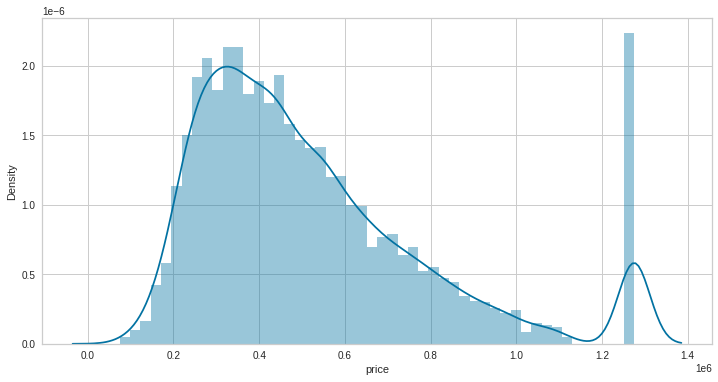

In [57]:
# Lets check the skewness after treating the outliers

#ceil_measure
print("Skewness is :\n", Dataset_final.skew().sort_values(ascending=False))
plt.figure(figsize=(12, 6))
sns.distplot(Dataset_final[item])
Dataset_final[item].describe()

From the above analysis we can clearly see a normally distributed data

As we already saw inline 14 for feature "room_bed" Cid 2402100895 is an outier so we drop it directly

In [58]:
#dropping the record from the dataset
Dataset_final.drop(Dataset_final[ (Dataset_final.room_bed == 33) ].index, inplace=True)

In [59]:
# Rounding off the features quality and condition

Dataset_final['condition'].value_counts()

3    14031
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

In [60]:
Dataset_final.loc[Dataset_final["quality"]< 5, "quality"] = 5
Dataset_final.loc[Dataset_final["quality"]> 10, "quality"] = 10

In [61]:
Dataset_final

price  room_bed  room_bath    ceil  coast  sight  condition  \
0     808100.00000         4    3.25000 1.00000      0      0          5   
1     277500.00000         4    2.50000 1.00000      0      0          3   
2     404000.00000         3    2.50000 2.00000      0      0          3   
3     300000.00000         2    1.00000 1.00000      0      0          4   
4     699000.00000         2    1.50000 1.00000      0      0          4   
...            ...       ...        ...     ...    ...    ...        ...   
21608 300000.00000         4    2.50000 2.00000      0      0          3   
21609 320000.00000         4    2.50000 2.00000      0      0          3   
21610 483453.00000         4    2.75000 2.00000      0      0          3   
21611 365000.00000         2    2.00000 1.00000      0      0          3   
21612 354950.00000         3    1.00000 1.50000      0      0          3   

       quality  basement      lat       long  living_measure15  lot_measure15  \
0            9         0 47.71740 -122.33600              2120     7553.00000   
1            8       800 47.31650 -122.38600              2260     8800.00000   
2            8         0 47.35150 -121.99900              2370     4348.00000   
3            6         0 47.70490 -122.34900              1520     3844.00000   
4            8         0 47.67680 -122.26900              1900     5940.00000   
...        ...       ...      ...        ...               ...            ...   
21608        8         0 47.32580 -122.16500              2516     4500.00000   
21609        8         0 47.37720 -122.12700              2910     5025.00000   
21610        8         0 47.48270 -121.77300              2620     5509.00000   
21611        7         0 47.76480 -122.15900              1780    15000.00000   
21612        7         0 47.71900 -122.32100              1730     6128.00000   

       furnished  total_area  has_renovated  yr_built_diff  difference  
0              1 16477.00000              0             66   397.25868  
1              0 10050.00000              0             46   393.40154  
2              0  6694.00000              0             16   373.83011  
3              0  4664.00000              0            106   420.40154  
4              0  5450.00000              0             68   373.25868  
...          ...         ...            ...            ...         ...  
21608          0  6129.00000              0             16   415.68725  
21609          0  8490.00000              0             19   417.40154  
21610          0  8317.00000              0              8   416.25868  
21611          0 16440.00000              0             37   404.54440  
21612          0  6892.00000              0             73   377.68725  

[21612 rows x 18 columns]

In [62]:
# Printing out the final shape of the Datset

Dataset_final.shape

(21612, 18)

### Encoding the Variables 

In [63]:
# Getting dummies for categorical columns below
Data = pd.get_dummies(Dataset_final, columns=['ceil', 'sight', 'condition', 'quality'],drop_first=True)


In [64]:
# Taking a look at the data with new columns:
Data.shape

(21612, 32)

In [65]:
Data.columns

Index(['price', 'room_bed', 'room_bath', 'coast', 'basement', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'has_renovated', 'yr_built_diff', 'difference', 'ceil_1.5', 'ceil_2.0',
       'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'sight_1', 'sight_2', 'sight_3',
       'sight_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'quality_6', 'quality_7', 'quality_8', 'quality_9', 'quality_10'],
      dtype='object')

### MODEL BUILDING

In [66]:
# Taking a look at the Final dataset ready for Model building
Data.head()

price  room_bed  room_bath  coast  basement      lat       long  \
0 808100.00000         4    3.25000      0         0 47.71740 -122.33600   
1 277500.00000         4    2.50000      0       800 47.31650 -122.38600   
2 404000.00000         3    2.50000      0         0 47.35150 -121.99900   
3 300000.00000         2    1.00000      0         0 47.70490 -122.34900   
4 699000.00000         2    1.50000      0         0 47.67680 -122.26900   

   living_measure15  lot_measure15  furnished  total_area  has_renovated  \
0              2120     7553.00000          1 16477.00000              0   
1              2260     8800.00000          0 10050.00000              0   
2              2370     4348.00000          0  6694.00000              0   
3              1520     3844.00000          0  4664.00000              0   
4              1900     5940.00000          0  5450.00000              0   

   yr_built_diff  difference  ceil_1.5  ceil_2.0  ceil_2.5  ceil_3.0  \
0             66   397.25868         0         0         0         0   
1             46   393.40154         0         0         0         0   
2             16   373.83011         0         1         0         0   
3            106   420.40154         0         0         0         0   
4             68   373.25868         0         0         0         0   

   ceil_3.5  sight_1  sight_2  sight_3  sight_4  condition_2  condition_3  \
0         0        0        0        0        0            0            0   
1         0        0        0        0        0            0            1   
2         0        0        0        0        0            0            1   
3         0        0        0        0        0            0            0   
4         0        0        0        0        0            0            0   

   condition_4  condition_5  quality_6  quality_7  quality_8  quality_9  \
0            0            1          0          0          0          1   
1            0            0          0          0          1          0   
2            0            0          0          0          1          0   
3            1            0          1          0          0          0   
4            1            0          0          0          1          0   

   quality_10  
0           0  
1           0  
2           0  
3           0  
4           0

#### separate independent and dependent variables

In [67]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
x = Data.drop('price', axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
x2= Data[['price']]

In [68]:

# scale all the columns of the Dataset. This will produce a numpy array
X_scaled = preprocessing.scale(x)
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(x2)
y_scaled = pd.DataFrame(y_scaled, columns=x2.columns)  # ideally the training and test should be 

In [69]:
# Spliting Data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(13831, 31)
(4323, 31)
(3458, 31)


## fit a simple linear model

In [71]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for room_bed is 0.017198327934987115
The coefficient for room_bath is 0.15246706656091452
The coefficient for coast is 0.05567724057654625
The coefficient for basement is 0.06604920043012928
The coefficient for lat is 0.2817448841083548
The coefficient for long is -0.02107747139772644
The coefficient for living_measure15 is 0.19250820835855384
The coefficient for lot_measure15 is -0.011125327842285539
The coefficient for furnished is -750889197924.9075
The coefficient for total_area is 0.009840338919592857
The coefficient for has_renovated is 0.042713420318796026
The coefficient for yr_built_diff is 0.19734061426631866
The coefficient for difference is -0.04371710850653652
The coefficient for ceil_1.5 is 0.03975542718666162
The coefficient for ceil_2.0 is 0.06985082005446183
The coefficient for ceil_2.5 is 0.028114828490061444
The coefficient for ceil_3.0 is 0.03385169124595592
The coefficient for ceil_3.5 is 0.018080021872117463
The coefficient for sight_1 is 0.0348935

In [72]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.005020827203154034


In [73]:
y_LR1_predtr= regression_model.predict(X_train)
y_LR1_predvl= regression_model.predict(X_val)


In [74]:
#Model score and Deduction for each Model in a DataFrame
regression_model_trscore=r2_score(y_train,y_LR1_predtr)
regression_model_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
regression_model_trMSE=mean_squared_error(y_train, y_LR1_predtr)
regression_model_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

regression_model_vlscore=r2_score(y_val,y_LR1_predvl)
regression_model_vlRMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
regression_model_vlMSE=mean_squared_error(y_val, y_LR1_predvl)
regression_model_vlMAE=mean_absolute_error(y_val, y_LR1_predvl)

Report_df=pd.DataFrame({'Method':['Linear Regression Model'],'Val Score':regression_model_vlscore,'RMSE_vl': regression_model_vlRMSE, 'MSE_vl': regression_model_vlMSE, 'MAE_vl': regression_model_vlMAE,'train Score':regression_model_trscore,'RMSE_tr': regression_model_trRMSE, 'MSE_tr': regression_model_trMSE, 'MAE_tr': regression_model_trMAE})



Report_df

Method  Val Score  RMSE_vl  MSE_vl  MAE_vl  train Score  \
0  Linear Regression Model    0.73132  0.51278 0.26294 0.37846      0.74291   

   RMSE_tr  MSE_tr  MAE_tr  
0  0.50956 0.25965 0.37438

The linear regression model had an R2 score of  0.74  both in training data set and 73 in validation data set respectively

## Create a regularized RIDGE model and note the coefficients

In [75]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.01745578  0.15241511  0.05583665  0.06597258  0.28178962 -0.02098646
   0.19250876 -0.01106118  0.31973206  0.00964251  0.04284786  0.1970882
  -0.04376587  0.03979263  0.06979334  0.0281172   0.03396672  0.01811739
   0.03510354  0.05076346  0.06185793  0.06420473  0.02006759  0.11478901
   0.16235735  0.13642942  0.04122933  0.18591163  0.31659622  0.1539088
   0.29072148]]


In [76]:
y_Ridge1_predtr= ridge.predict(X_train)
y_Ridge1_predvl= ridge.predict(X_val)

In [77]:
ridge_trscore=r2_score(y_train,y_Ridge1_predtr)
ridge_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
ridge_trMSE=mean_squared_error(y_train, y_Ridge1_predtr)
ridge_trMAE=mean_absolute_error(y_train, y_Ridge1_predtr)

ridge_vlscore=r2_score(y_val,y_Ridge1_predvl)
ridge_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Ridge1_predvl))
ridge_vlMSE=mean_squared_error(y_val, y_Ridge1_predvl)
ridge_vlMAE=mean_absolute_error(y_val, y_Ridge1_predvl)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Val Score':ridge_vlscore,'RMSE_vl': ridge_vlRMSE, 'MSE_vl': ridge_vlMSE, 'MAE_vl': ridge_vlMAE,'train Score':ridge_trscore,'RMSE_tr': ridge_trRMSE, 'MSE_tr': ridge_trMSE, 'MAE_tr': ridge_trMAE})
Report_df = pd.concat([Report_df, Ridge1_df])

Report_df

Method  Val Score  RMSE_vl  MSE_vl  MAE_vl  train Score  \
0  Linear Regression Model    0.73132  0.51278 0.26294 0.37846      0.74291   
0        Linear-Reg Ridge1    0.73131  0.51278 0.26295 0.37846      0.74291   

   RMSE_tr  MSE_tr  MAE_tr  
0  0.50956 0.25965 0.37438  
0  0.50956 0.25965 0.37440

Similar to Linear Regression model,  linear Ridge model had an R2 score of 74% in training data set and validation data set score 73 respectively. 

## Create a regularized LASSO model and note the coefficients

In [78]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.          0.13836946  0.00942976  0.06058908  0.23429805 -0.
  0.23242113  0.          0.23258094  0.          0.          0.03405153
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01373138 -0.         -0.
  0.          0.         -0.         -0.0065035   0.          0.
  0.11116484]


In [79]:
y_Lasso1_predtr= lasso.predict(X_train)
y_Lasso1_predvl= lasso.predict(X_val)

In [80]:
#Model score and Deduction for each Model in a DataFrame
Lasso_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)

Lasso_vlscore=r2_score(y_val,y_Lasso1_predvl)
Lasso_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso_vlMSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso_vlMAE=mean_absolute_error(y_val, y_Lasso1_predvl)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Val Score':Lasso_vlscore,'RMSE_vl': Lasso_vlRMSE, 'MSE_vl': Lasso_vlMSE, 'MAE_vl': Lasso_vlMAE,'train Score':Lasso_trscore,'RMSE_tr': Lasso_trRMSE, 'MSE_tr': Lasso_trMSE, 'MAE_tr': Lasso_trMAE})
Report_df = pd.concat([Report_df, Lasso1_df])

Report_df

Method  Val Score  RMSE_vl  MSE_vl  MAE_vl  train Score  \
0  Linear Regression Model    0.73132  0.51278 0.26294 0.37846      0.74291   
0        Linear-Reg Ridge1    0.73131  0.51278 0.26295 0.37846      0.74291   
0        Linear-Reg Lasso1    0.64518  0.58927 0.34723 0.44101      0.64131   

   RMSE_tr  MSE_tr  MAE_tr  
0  0.50956 0.25965 0.37438  
0  0.50956 0.25965 0.37440  
0  0.60189 0.36227 0.44859

On comparing the results, Un regularized model score and Ridge  model gives the same  result.wheras Lasso performs very poorly on both training and testing set which may be because most of the coefficients were 0 in this case.

## Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [81]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [82]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, x2, test_size=0.30, random_state=1)
X_train.shape

(15128, 497)

In [83]:
# Fit a simple non regularized linear model on poly features-

regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[-9.34633654e+12  8.70491971e+11  2.60278203e+12  5.00991599e+16
  1.79662309e+14  3.57986135e+12 -1.62279486e+11 -5.81612404e+12
 -4.15464393e+12  3.37940615e+15  2.05846802e+12  4.31048857e+12
 -7.03802694e+13 -1.56893045e+11 -1.13777436e+15 -2.26410626e+14
  8.29499989e+14  4.46307808e+14 -7.99672822e+14 -4.96953391e+14
 -1.14720085e+15 -7.98933394e+14 -9.20167371e+14  2.37503889e+15
  8.15932632e+14 -2.39236906e+14  2.75002717e+14 -8.25543744e+14
 -3.31806315e+14  1.52183536e+15  1.90474328e+15 -1.33140390e+15
 -3.97264231e+01 -4.41000000e+02 -2.05746875e+03  2.93837500e+03
  2.03825000e+03 -7.69046875e+02  2.03650000e+03 -2.64783509e+14
 -2.12800000e+03 -2.50637500e+03  6.24937500e+03  1.33000000e+03
 -2.37781250e+02  9.62650000e+03  2.38500000e+02  4.34487500e+03
  4.52362772e+13 -4.42906250e+02  8.99500000e+02 -9.89000000e+02
 -3.40600000e+03  2.61321875e+04  1.43678875e+05  1.31235250e+05
  7.87084375e+04  3.88212500e+03  3.24801562e+03  4.64070312e+03
  2.17238288e+14  1.76199

In [84]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  7.85727712e+03  3.51864142e+04  4.03669368e+03
   1.89113777e+04  7.85744628e+04 -5.22844164e+03  6.88592418e+04
  -1.20300894e+04  1.79156273e+04  3.00723022e+03  1.31453519e+04
   3.58023688e+04 -1.07512362e+04  2.82405324e+03  1.25367239e+04
   2.69048314e+03  5.71006708e+03  3.36052383e+02  6.23334282e+03
   1.15907194e+04  7.03914284e+03  1.18893637e+04 -2.32004873e+03
  -2.91793499e+04  4.53477550e+02  2.88333733e+03 -2.27446963e+03
   8.86170738e+03  2.89350954e+04  1.13641912e+04  1.29116661e+04
  -4.09082079e+01 -4.15827452e+02 -2.08130137e+03  2.93299507e+03
   2.03135424e+03 -7.48998707e+02  2.02389596e+03  6.71823906e+03
  -2.11994214e+03 -2.49945021e+03  6.24394246e+03  1.34003541e+03
  -2.62362064e+02  9.60014951e+03  2.27990341e+02  4.34486809e+03
   6.42461825e+02 -4.47029524e+02  9.06054567e+02 -1.00172236e+03
  -3.41565567e+03  1.45888351e+04  8.16919235e+04  7.40446189e+04
   4.37439677e+04  3.86750107e+03  3.24813609e+03  4.63689107e+

In [85]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.788768354982119
0.7596430956984837


In [86]:
# We see good improvement in the train score with polynomial features 74 to 79 , and test 76%

In [87]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00  7.96760856e+03  3.51344207e+04  4.16204891e+04
  1.89384901e+04  7.85237783e+04 -5.21366665e+03  6.87368212e+04
 -1.20523741e+04  9.96659537e+04  3.02327539e+03  1.31437514e+04
  3.59316005e+04 -1.08267975e+04  1.38927104e+04  1.74112620e+04
  1.13086680e+04  9.21353480e+03  1.78278697e+03  1.07746611e+04
  1.76419525e+04  1.42208249e+04  9.25751337e+03 -2.56588861e+03
 -1.32463703e+04  7.68401279e+02  1.08570366e+04  1.39751181e+03
 -9.05248310e+03  3.53247459e+04 -1.70479232e+04  3.10299293e+04
 -3.70221682e+01 -3.61325372e+02 -2.10118068e+03  2.91553625e+03
  2.01235249e+03 -7.22284197e+02  2.00930254e+03  9.60048686e+03
 -2.08534420e+03 -2.49686421e+03  6.25171516e+03  1.36112716e+03
 -3.17733442e+02  9.57276985e+03  2.18213282e+02  4.34147785e+03
  3.85983154e+02 -4.47982923e+02  9.04069322e+02 -1.00110311e+03
 -3.43967053e+03  5.91267752e+03  3.52404154e+04  3.12141847e+04
  1.75528682e+04  3.89187304e+03  3.45681522e+03  4.82336886e+03
  4.07119896

In [88]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7887094670167376
0.763892147969099


In [89]:
# We see good improvement in the train score with polynomial features 74 to 78  and 76 in test data

# Comparison of Regreassion models using Pycaret

In [90]:
X = Data.drop('price', axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = Data['price']

wx_train, wx_test, y_train, y_test=train_test_split(X,y, random_state=14, test_size=0.20)
wx_train.shape, wx_test.shape, y_train.shape, y_test.shape

((17289, 31), (4323, 31), (17289,), (4323,))

In [91]:
X.dtypes

room_bed              int64
room_bath           float64
coast                 int64
basement              int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15       float64
furnished             int64
total_area          float64
has_renovated         int64
yr_built_diff         int64
difference          float64
ceil_1.5              uint8
ceil_2.0              uint8
ceil_2.5              uint8
ceil_3.0              uint8
ceil_3.5              uint8
sight_1               uint8
sight_2               uint8
sight_3               uint8
sight_4               uint8
condition_2           uint8
condition_3           uint8
condition_4           uint8
condition_5           uint8
quality_6             uint8
quality_7             uint8
quality_8             uint8
quality_9             uint8
quality_10            uint8
dtype: object

In [92]:
# apply Z score for train data 

Xms_train=wx_train[['room_bed', 'room_bath', 'basement','lat', 'long', 'living_measure15',
                   'lot_measure15', 'total_area','difference', 'yr_built_diff'] ]
Xms_train=Xms_train.apply(zscore)
display(Xms_train)

Xms_train1=wx_train[["ceil_1.5","ceil_2.0","ceil_2.5","ceil_3.0","ceil_3.5", "sight_1","sight_2","sight_3","sight_4","condition_2",
                     "condition_3", "condition_4",'condition_5', "quality_6", "quality_7", "quality_8","quality_9","quality_10",
                    "coast", 'furnished', 'has_renovated']]
X_train=pd.concat([Xms_train,Xms_train1], axis=1)

X_train

room_bed  room_bath  basement      lat     long  living_measure15  \
11512   0.69143   -1.45356  -0.65790 -1.60679  0.63469          -0.85528   
11076  -1.50927   -1.45356  -0.65790  0.86292 -0.99624          -0.59282   
4979   -1.50927   -1.45356  -0.20414  1.00205 -0.99624           0.20913   
11468  -0.40892    0.50187  -0.65790 -1.09569 -0.00074           0.15080   
21044   0.69143    1.80550   1.97390  0.47004  1.20658           1.50682   
...         ...        ...       ...      ...      ...               ...   
12026   1.79179    0.50187  -0.65790 -0.10449  0.20401           1.20063   
18839  -0.40892   -0.80175  -0.65790 -0.40798 -0.37493          -0.15539   
9485   -0.40892   -0.80175  -0.65790 -1.20454 -1.70227          -0.41785   
13657   0.69143    0.50187  -0.65790  0.21485  1.37602           0.37827   
19052  -0.40892   -0.80175  -0.65790 -1.67239 -0.83385          -1.10315   

       lot_measure15  total_area  difference  yr_built_diff  
11512        2.92215     2.78594     0.73016        0.10428  
11076       -0.50841    -0.49607    -0.35843        2.15093  
4979        -0.40004    -0.42880     1.32313        1.02527  
11468       -0.03932    -0.18917    -0.41153       -0.68027  
21044       -0.26039    -0.02163     0.63281       -0.64616  
...              ...         ...         ...            ...  
12026       -0.44730    -0.39548    -1.42046       -1.22605  
18839       -0.17448    -0.34619     0.86291        1.36638  
9485         2.92215     2.78594    -0.66819       -0.16861  
13657       -0.47950    -0.44108     0.11064       -1.08960  
19052       -0.27024    -0.35291     0.02214        0.17250  

[17289 rows x 10 columns]

room_bed  room_bath  basement      lat     long  living_measure15  \
11512   0.69143   -1.45356  -0.65790 -1.60679  0.63469          -0.85528   
11076  -1.50927   -1.45356  -0.65790  0.86292 -0.99624          -0.59282   
4979   -1.50927   -1.45356  -0.20414  1.00205 -0.99624           0.20913   
11468  -0.40892    0.50187  -0.65790 -1.09569 -0.00074           0.15080   
21044   0.69143    1.80550   1.97390  0.47004  1.20658           1.50682   
...         ...        ...       ...      ...      ...               ...   
12026   1.79179    0.50187  -0.65790 -0.10449  0.20401           1.20063   
18839  -0.40892   -0.80175  -0.65790 -0.40798 -0.37493          -0.15539   
9485   -0.40892   -0.80175  -0.65790 -1.20454 -1.70227          -0.41785   
13657   0.69143    0.50187  -0.65790  0.21485  1.37602           0.37827   
19052  -0.40892   -0.80175  -0.65790 -1.67239 -0.83385          -1.10315   

       lot_measure15  total_area  difference  yr_built_diff  ceil_1.5  \
11512        2.92215     2.78594     0.73016        0.10428         0   
11076       -0.50841    -0.49607    -0.35843        2.15093         1   
4979        -0.40004    -0.42880     1.32313        1.02527         0   
11468       -0.03932    -0.18917    -0.41153       -0.68027         0   
21044       -0.26039    -0.02163     0.63281       -0.64616         0   
...              ...         ...         ...            ...       ...   
12026       -0.44730    -0.39548    -1.42046       -1.22605         0   
18839       -0.17448    -0.34619     0.86291        1.36638         1   
9485         2.92215     2.78594    -0.66819       -0.16861         0   
13657       -0.47950    -0.44108     0.11064       -1.08960         0   
19052       -0.27024    -0.35291     0.02214        0.17250         0   

       ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  sight_1  sight_2  sight_3  \
11512         0         0         0         0        0        0        0   
11076         0         0         0         0        0        0        0   
4979          0         0         0         0        0        0        0   
11468         1         0         0         0        0        0        0   
21044         1         0         0         0        0        0        0   
...         ...       ...       ...       ...      ...      ...      ...   
12026         1         0         0         0        0        0        0   
18839         0         0         0         0        0        0        0   
9485          0         0         0         0        0        0        0   
13657         1         0         0         0        0        0        0   
19052         0         0         0         0        0        0        0   

       sight_4  condition_2  condition_3  condition_4  condition_5  quality_6  \
11512        0            0            1            0            0          0   
11076        0            0            0            1            0          1   
4979         0            0            0            1            0          0   
11468        0            0            1            0            0          0   
21044        0            0            1            0            0          0   
...        ...          ...          ...          ...          ...        ...   
12026        0            0            1            0            0          0   
18839        0            0            1            0            0          0   
9485         0            0            0            1            0          1   
13657        0            0            1            0            0          0   
19052        0            0            1            0            0          0   

       quality_7  quality_8  quality_9  quality_10  coast  furnished  \
11512          0          0          0           0      0          0   
11076          0          0          0           0      0          0   
4979           1          0          0           0      0          0   
11468          0          1          0     

In [93]:
# Apply Z score for test data:

Xms_test=wx_test[['room_bed', 'room_bath', 'basement', 'lat', 'long','living_measure15',
                   'lot_measure15', 'total_area','difference', 'yr_built_diff'] ]
Xms_test=Xms_test.apply(zscore)
display(Xms_test)

Xms_test1=wx_test[["ceil_1.5","ceil_2.0","ceil_2.5","ceil_3.0","ceil_3.5", "sight_1","sight_2","sight_3","sight_4","condition_2",
                     "condition_3", "condition_4",'condition_5', "quality_6", "quality_7", "quality_8","quality_9","quality_10",
                    "coast", 'furnished', 'has_renovated']]
X_test=pd.concat([Xms_test,Xms_test1], axis=1)

X_test

room_bed  room_bath  basement      lat     long  living_measure15  \
7806   -1.50448   -1.42377  -0.66173  0.40786 -0.54654          -0.68263   
18737  -0.39894    1.77195   0.48576  1.39546  0.32642           0.59012   
3163   -0.39894   -0.14548  -0.66173 -0.07797  1.59949          -0.65337   
8588   -0.39894    0.49366  -0.66173 -1.83781 -0.47379           2.29737   
11800  -0.39894    1.45238  -0.66173  0.81174 -1.16488          -0.66800   
...         ...        ...       ...      ...      ...               ...   
2248    0.70659    1.13280   1.18403  0.86975 -1.08486          -0.58023   
16169   0.70659    0.49366  -0.66173 -1.39549  1.44672           0.23902   
17919  -1.50448   -0.46505  -0.66173 -1.27730 -0.73568          -0.97522   
18957  -0.39894    0.49366  -0.66173  0.49124  0.91567           0.80956   
9446    2.91765    3.68938   3.47455  0.60944 -1.38312           1.67269   

       lot_measure15  total_area  difference  yr_built_diff  
7806        -0.48481    -0.41895     1.15661        0.73665  
18737       -0.48376    -0.39899     1.48332       -1.22294  
3163        -0.62641    -0.55933     1.39502       -1.15537  
8588        -0.46241    -0.44781     0.31778       -1.15537  
11800       -0.63829    -0.56718     1.15661       -1.18916  
...              ...         ...         ...            ...  
2248        -0.47903    -0.40290    -1.05967        2.12188  
16169       -0.49912    -0.45134    -1.13031       -1.32430  
17919       -0.53175    -0.42838     1.20959       -0.24315  
18957        0.06001    -0.13631     1.48332       -0.14179  
9446        -0.37051     2.82532     0.30895        1.27723  

[4323 rows x 10 columns]

room_bed  room_bath  basement      lat     long  living_measure15  \
7806   -1.50448   -1.42377  -0.66173  0.40786 -0.54654          -0.68263   
18737  -0.39894    1.77195   0.48576  1.39546  0.32642           0.59012   
3163   -0.39894   -0.14548  -0.66173 -0.07797  1.59949          -0.65337   
8588   -0.39894    0.49366  -0.66173 -1.83781 -0.47379           2.29737   
11800  -0.39894    1.45238  -0.66173  0.81174 -1.16488          -0.66800   
...         ...        ...       ...      ...      ...               ...   
2248    0.70659    1.13280   1.18403  0.86975 -1.08486          -0.58023   
16169   0.70659    0.49366  -0.66173 -1.39549  1.44672           0.23902   
17919  -1.50448   -0.46505  -0.66173 -1.27730 -0.73568          -0.97522   
18957  -0.39894    0.49366  -0.66173  0.49124  0.91567           0.80956   
9446    2.91765    3.68938   3.47455  0.60944 -1.38312           1.67269   

       lot_measure15  total_area  difference  yr_built_diff  ceil_1.5  \
7806        -0.48481    -0.41895     1.15661        0.73665         0   
18737       -0.48376    -0.39899     1.48332       -1.22294         0   
3163        -0.62641    -0.55933     1.39502       -1.15537         0   
8588        -0.46241    -0.44781     0.31778       -1.15537         0   
11800       -0.63829    -0.56718     1.15661       -1.18916         0   
...              ...         ...         ...            ...       ...   
2248        -0.47903    -0.40290    -1.05967        2.12188         0   
16169       -0.49912    -0.45134    -1.13031       -1.32430         0   
17919       -0.53175    -0.42838     1.20959       -0.24315         0   
18957        0.06001    -0.13631     1.48332       -0.14179         0   
9446        -0.37051     2.82532     0.30895        1.27723         0   

       ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  sight_1  sight_2  sight_3  \
7806          0         0         0         0        0        0        0   
18737         1         0         0         0        0        0        0   
3163          1         0         0         0        0        0        0   
8588          1         0         0         0        0        0        0   
11800         0         0         1         0        0        0        0   
...         ...       ...       ...       ...      ...      ...      ...   
2248          1         0         0         0        0        0        0   
16169         1         0         0         0        0        0        0   
17919         0         0         0         0        0        0        0   
18957         1         0         0         0        0        0        0   
9446          0         1         0         0        0        0        0   

       sight_4  condition_2  condition_3  condition_4  condition_5  quality_6  \
7806         0            0            1            0            0          1   
18737        0            0            1            0            0          0   
3163         0            0            1            0            0          0   
8588         0            0            1            0            0          0   
11800        0            0            1            0            0          0   
...        ...          ...          ...          ...          ...        ...   
2248         0            0            1            0            0          0   
16169        0            0            1            0            0          0   
17919        0            0            0            1            0          0   
18957        0            0            0            1            0          0   
9446         0            0            1            0            0          0   

       quality_7  quality_8  quality_9  quality_10  coast  furnished  \
7806           0          0          0           0      0          0   
18737          0          1          0           0      0          0   
3163           0          1          0           0      0          0   
8588           1          0          0     

In [94]:
# Test/Train split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17289, 31), (4323, 31), (17289,), (4323,))

In [95]:
train=pd.concat([X_train, y_train], axis=1)

test=pd.concat([X_test, y_test], axis=1)

In [96]:
train # Taking a look at the train data 

room_bed  room_bath  basement      lat     long  living_measure15  \
11512   0.69143   -1.45356  -0.65790 -1.60679  0.63469          -0.85528   
11076  -1.50927   -1.45356  -0.65790  0.86292 -0.99624          -0.59282   
4979   -1.50927   -1.45356  -0.20414  1.00205 -0.99624           0.20913   
11468  -0.40892    0.50187  -0.65790 -1.09569 -0.00074           0.15080   
21044   0.69143    1.80550   1.97390  0.47004  1.20658           1.50682   
...         ...        ...       ...      ...      ...               ...   
12026   1.79179    0.50187  -0.65790 -0.10449  0.20401           1.20063   
18839  -0.40892   -0.80175  -0.65790 -0.40798 -0.37493          -0.15539   
9485   -0.40892   -0.80175  -0.65790 -1.20454 -1.70227          -0.41785   
13657   0.69143    0.50187  -0.65790  0.21485  1.37602           0.37827   
19052  -0.40892   -0.80175  -0.65790 -1.67239 -0.83385          -1.10315   

       lot_measure15  total_area  difference  yr_built_diff  ceil_1.5  \
11512        2.92215     2.78594     0.73016        0.10428         0   
11076       -0.50841    -0.49607    -0.35843        2.15093         1   
4979        -0.40004    -0.42880     1.32313        1.02527         0   
11468       -0.03932    -0.18917    -0.41153       -0.68027         0   
21044       -0.26039    -0.02163     0.63281       -0.64616         0   
...              ...         ...         ...            ...       ...   
12026       -0.44730    -0.39548    -1.42046       -1.22605         0   
18839       -0.17448    -0.34619     0.86291        1.36638         1   
9485         2.92215     2.78594    -0.66819       -0.16861         0   
13657       -0.47950    -0.44108     0.11064       -1.08960         0   
19052       -0.27024    -0.35291     0.02214        0.17250         0   

       ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  sight_1  sight_2  sight_3  \
11512         0         0         0         0        0        0        0   
11076         0         0         0         0        0        0        0   
4979          0         0         0         0        0        0        0   
11468         1         0         0         0        0        0        0   
21044         1         0         0         0        0        0        0   
...         ...       ...       ...       ...      ...      ...      ...   
12026         1         0         0         0        0        0        0   
18839         0         0         0         0        0        0        0   
9485          0         0         0         0        0        0        0   
13657         1         0         0         0        0        0        0   
19052         0         0         0         0        0        0        0   

       sight_4  condition_2  condition_3  condition_4  condition_5  quality_6  \
11512        0            0            1            0            0          0   
11076        0            0            0            1            0          1   
4979         0            0            0            1            0          0   
11468        0            0            1            0            0          0   
21044        0            0            1            0            0          0   
...        ...          ...          ...          ...          ...        ...   
12026        0            0            1            0            0          0   
18839        0            0            1            0            0          0   
9485         0            0            0            1            0          1   
13657        0            0            1            0            0          0   
19052        0            0            1            0            0          0   

       quality_7  quality_8  quality_9  quality_10  coast  furnished  \
11512          0          0          0           0      0          0   
11076          0          0          0           0      0          0   
4979           1          0          0           0      0          0   
11468          0          1          0     

In [97]:
test # Taking a look at the test data 

room_bed  room_bath  basement      lat     long  living_measure15  \
7806   -1.50448   -1.42377  -0.66173  0.40786 -0.54654          -0.68263   
18737  -0.39894    1.77195   0.48576  1.39546  0.32642           0.59012   
3163   -0.39894   -0.14548  -0.66173 -0.07797  1.59949          -0.65337   
8588   -0.39894    0.49366  -0.66173 -1.83781 -0.47379           2.29737   
11800  -0.39894    1.45238  -0.66173  0.81174 -1.16488          -0.66800   
...         ...        ...       ...      ...      ...               ...   
2248    0.70659    1.13280   1.18403  0.86975 -1.08486          -0.58023   
16169   0.70659    0.49366  -0.66173 -1.39549  1.44672           0.23902   
17919  -1.50448   -0.46505  -0.66173 -1.27730 -0.73568          -0.97522   
18957  -0.39894    0.49366  -0.66173  0.49124  0.91567           0.80956   
9446    2.91765    3.68938   3.47455  0.60944 -1.38312           1.67269   

       lot_measure15  total_area  difference  yr_built_diff  ceil_1.5  \
7806        -0.48481    -0.41895     1.15661        0.73665         0   
18737       -0.48376    -0.39899     1.48332       -1.22294         0   
3163        -0.62641    -0.55933     1.39502       -1.15537         0   
8588        -0.46241    -0.44781     0.31778       -1.15537         0   
11800       -0.63829    -0.56718     1.15661       -1.18916         0   
...              ...         ...         ...            ...       ...   
2248        -0.47903    -0.40290    -1.05967        2.12188         0   
16169       -0.49912    -0.45134    -1.13031       -1.32430         0   
17919       -0.53175    -0.42838     1.20959       -0.24315         0   
18957        0.06001    -0.13631     1.48332       -0.14179         0   
9446        -0.37051     2.82532     0.30895        1.27723         0   

       ceil_2.0  ceil_2.5  ceil_3.0  ceil_3.5  sight_1  sight_2  sight_3  \
7806          0         0         0         0        0        0        0   
18737         1         0         0         0        0        0        0   
3163          1         0         0         0        0        0        0   
8588          1         0         0         0        0        0        0   
11800         0         0         1         0        0        0        0   
...         ...       ...       ...       ...      ...      ...      ...   
2248          1         0         0         0        0        0        0   
16169         1         0         0         0        0        0        0   
17919         0         0         0         0        0        0        0   
18957         1         0         0         0        0        0        0   
9446          0         1         0         0        0        0        0   

       sight_4  condition_2  condition_3  condition_4  condition_5  quality_6  \
7806         0            0            1            0            0          1   
18737        0            0            1            0            0          0   
3163         0            0            1            0            0          0   
8588         0            0            1            0            0          0   
11800        0            0            1            0            0          0   
...        ...          ...          ...          ...          ...        ...   
2248         0            0            1            0            0          0   
16169        0            0            1            0            0          0   
17919        0            0            0            1            0          0   
18957        0            0            0            1            0          0   
9446         0            0            1            0            0          0   

       quality_7  quality_8  quality_9  quality_10  coast  furnished  \
7806           0          0          0           0      0          0   
18737          0          1          0           0      0          0   
3163           0          1          0           0      0          0   
8588           1          0          0     

In [98]:
s=setup(data=train, target='price') # Passing the datset to Py caret library for model comparison

Description             Value
0                               session_id              6541
1                                   Target             price
2                            Original Data       (17289, 32)
3                           Missing Values             False
4                         Numeric Features                28
5                     Categorical Features                 3
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set       (12102, 31)
10                    Transformed Test Set        (5187, 31)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              73b3
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [99]:
# With scaling , comparing different Liner regression models

best=compare_models()

Model          MAE                MSE  \
lightgbm  Light Gradient Boosting Machine  62098.61900   8337804669.87270   
rf                Random Forest Regressor  65728.40340   9796942517.99140   
et                  Extra Trees Regressor  66385.94130   9938038939.87230   
gbr           Gradient Boosting Regressor  72401.04600  10864663764.32680   
knn                 K Neighbors Regressor  87067.39690  16724850176.00000   
ridge                    Ridge Regression 101466.29840  19261085798.40000   
br                         Bayesian Ridge 101464.19200  19260617555.06090   
lasso                    Lasso Regression 101487.53200  19272190976.00000   
llar         Lasso Least Angle Regression 101487.07720  19272318466.44570   
lr                      Linear Regression 101486.95470  19272148992.00000   
huber                     Huber Regressor 100203.80090  19588833008.16670   
dt                Decision Tree Regressor  92766.45920  19806290268.23640   
par          Passive Aggressive Regressor 101007.79420  20047004267.30380   
en                            Elastic Net 122296.62030  27450513612.80000   
ada                    AdaBoost Regressor 141559.00560  27789190892.87150   
omp           Orthogonal Matching Pursuit 126328.59120  29713062256.05300   
dummy                     Dummy Regressor 207692.20160  72559848243.20000   
lar                Least Angle Regression 146396.80220 102981288513.64191   

                 RMSE       R2   RMSLE    MAPE  TT (Sec)  
lightgbm  91252.44860  0.88490 0.17210 0.12990   0.24400  
rf        98848.98400  0.86500 0.18250 0.13670   7.00900  
et        99553.35060  0.86300 0.18360 0.13710   3.83700  
gbr      104145.16480  0.85010 0.19330 0.15090   1.87900  
knn      129131.12340  0.76950 0.22990 0.17510   0.31200  
ridge    138659.52810  0.73410 0.28330 0.21420   0.01700  
br       138657.73230  0.73410 0.28410 0.21420   0.03200  
lasso    138698.86410  0.73400 0.28330 0.21420   0.17600  
llar     138699.16790  0.73400 0.28670 0.21430   0.02300  
lr       138698.71560  0.73400 0.28340 0.21420   0.29000  
huber    139807.38510  0.72970 0.26770 0.20590   0.31600  
dt       140714.33740  0.72610 0.26020 0.19350   0.12600  
par      141421.35590  0.72340 0.26710 0.20610   1.53500  
en       165552.40310  0.62120 0.30260 0.26640   0.01900  
ada      166651.23650  0.61520 0.34970 0.35470   0.98600  
omp      172219.62700  0.58990 0.30880 0.26170   0.01800  
dummy    269283.04690 -0.00140 0.50900 0.49870   0.01200  
lar      308699.62510 -0.42850 0.39930 0.41110   0.02200

In [100]:
 predict_model(best) # Predicting the Best model

Model         MAE              MSE        RMSE  \
0  Light Gradient Boosting Machine 61870.22890 8229333742.38210 90715.67530   

       R2   RMSLE    MAPE  
0 0.88980 0.17540 0.13270

room_bed  room_bath  basement      lat     long  living_measure15  \
0      2.89214    2.45731   1.58821  0.66828 -1.35631          -0.81153   
1     -1.50927   -1.45356  -0.65790  1.18803 -0.83385          -1.14689   
2      0.69143    1.47959  -0.65790 -0.30994  1.17834          -0.11165   
3     -0.40892   -0.47584   0.54456  1.07053 -0.12076          -0.18456   
4     -0.40892    0.50187  -0.65790 -1.73582 -0.41729           0.31119   
...        ...        ...       ...      ...      ...               ...   
5182  -0.40892    0.50187   1.83778  0.02887  0.42288           0.73404   
5183   0.69143    0.82778  -0.65790 -0.53413  0.49349           1.21521   
5184  -0.40892   -0.47584  -0.65790  0.43616 -0.73501          -0.70947   
5185  -0.40892    0.50187  -0.65790 -0.62784  0.16871          -0.47617   
5186  -0.40892   -0.80175  -0.65790  0.48446  1.12891           0.86527   

      lot_measure15  total_area  difference  yr_built_diff  ...  quality_6  \
0          -0.38802    -0.33725     0.32305        0.88882  ...          0   
1          -0.29963    -0.28313    -0.00441        0.82060  ...          0   
2           0.14115     2.78594    -0.01326       -0.44150  ...          0   
3          -0.34602    -0.35912     0.80981       -0.16861  ...          0   
4          -0.26039    -0.28910    -1.62402       -0.57794  ...          0   
...             ...         ...         ...            ...  ...        ...   
5182       -0.18363    -0.23632    -0.85404        0.13839  ...          0   
5183       -0.26125    -0.22615     0.37615       -1.39660  ...          0   
5184       -0.59501    -0.50883     0.55315        2.38970  ...          0   
5185       -0.48676    -0.48089    -0.88059       -0.47561  ...          0   
5186       -0.06325    -0.20217     0.05754       -0.10039  ...          0   

      quality_7  quality_8  quality_9  quality_10  coast_1  furnished_1  \
0             0          0          1           0  0.00000      1.00000   
1             1          0          0           0  0.00000      0.00000   
2             0          1          0           0  0.00000      0.00000   
3             0          1          0           0  0.00000      0.00000   
4             0          1          0           0  0.00000      0.00000   
...         ...        ...        ...         ...      ...          ...   
5182          0          1          0           0  0.00000      0.00000   
5183          0          1          0           0  0.00000      0.00000   
5184          0          1          0           0  0.00000      0.00000   
5185          1          0          0           0  0.00000      0.00000   
5186          0          0          1           0  0.00000      1.00000   

      has_renovated_1         price         Label  
0             1.00000 1110000.00000 1021424.78018  
1             0.00000  345000.00000  335641.67880  
2             0.00000  605000.00000  592888.11120  
3             0.00000  432100.00000  470041.29499  
4             0.00000  289950.00000  299993.77228  
...               ...           ...           ...  
5182          0.00000  895000.00000  700559.03189  
5183          0.00000  579000.00000  549790.59446  
5184          0.00000  550000.00000  695410.85750  
5185          0.00000  303000.00000  296363.71667  
5186          0.00000  539000.00000  662994.73813  

[5187 rows x 33 columns]

In [101]:
predict_model(best,data=test) # Prediction on the test data 

Model         MAE              MSE        RMSE  \
0  Light Gradient Boosting Machine 62748.28650 8574299036.41150 92597.51100   

       R2   RMSLE    MAPE  
0 0.88320 0.18030 0.13470

room_bed  room_bath  basement      lat     long  living_measure15  \
7806   -1.50448   -1.42377  -0.66173  0.40786 -0.54654          -0.68263   
18737  -0.39894    1.77195   0.48576  1.39546  0.32642           0.59012   
3163   -0.39894   -0.14548  -0.66173 -0.07797  1.59949          -0.65337   
8588   -0.39894    0.49366  -0.66173 -1.83781 -0.47379           2.29737   
11800  -0.39894    1.45238  -0.66173  0.81174 -1.16488          -0.66800   
...         ...        ...       ...      ...      ...               ...   
2248    0.70659    1.13280   1.18403  0.86975 -1.08486          -0.58023   
16169   0.70659    0.49366  -0.66173 -1.39549  1.44672           0.23902   
17919  -1.50448   -0.46505  -0.66173 -1.27730 -0.73568          -0.97522   
18957  -0.39894    0.49366  -0.66173  0.49124  0.91567           0.80956   
9446    2.91765    3.68938   3.47455  0.60944 -1.38312           1.67269   

       lot_measure15  total_area  difference  yr_built_diff  ...  quality_6  \
7806        -0.48481    -0.41895     1.15661        0.73665  ...          1   
18737       -0.48376    -0.39899     1.48332       -1.22294  ...          0   
3163        -0.62641    -0.55933     1.39502       -1.15537  ...          0   
8588        -0.46241    -0.44781     0.31778       -1.15537  ...          0   
11800       -0.63829    -0.56718     1.15661       -1.18916  ...          0   
...              ...         ...         ...            ...  ...        ...   
2248        -0.47903    -0.40290    -1.05967        2.12188  ...          0   
16169       -0.49912    -0.45134    -1.13031       -1.32430  ...          0   
17919       -0.53175    -0.42838     1.20959       -0.24315  ...          0   
18957        0.06001    -0.13631     1.48332       -0.14179  ...          0   
9446        -0.37051     2.82532     0.30895        1.27723  ...          0   

       quality_7  quality_8  quality_9  quality_10  coast  furnished  \
7806           0          0          0           0      0          0   
18737          0          1          0           0      0          0   
3163           0          1          0           0      0          0   
8588           1          0          0           0      0          0   
11800          0          1          0           0      0          0   
...          ...        ...        ...         ...    ...        ...   
2248           0          1          0           0      0          0   
16169          1          0          0           0      0          0   
17919          0          1          0           0      0          0   
18957          0          0          1           0      0          1   
9446           0          0          0           1      0          1   

       has_renovated         price         Label  
7806               0  436000.00000  460679.40132  
18737              0  525000.00000  539055.66109  
3163               0  402000.00000  381677.62272  
8588               0  254950.00000  355329.79551  
11800              0  607500.00000  498081.22147  
...              ...           ...           ...  
2248               1  855000.00000  893217.29763  
16169              0  340000.00000  329412.83547  
17919              0  210000.00000  253335.96372  
18957              0  645000.00000  685173.02483  
9446               1 1274906.62223 1314555.26498  

[4323 rows x 33 columns]

## We can see that Light Gradient Boosting Machine	outperformed any other Linear regression model by providing a train score of approximately 88% and Test score of approximately 88%

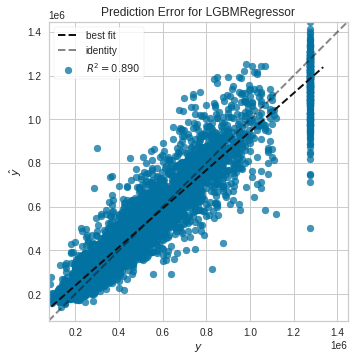

In [102]:
plot_model(best,plot='error') # Plotting the Error plot f the LGBM model

### Ensemble models: in summary ensemble models have performed well on training and validation sets. These models will be selected for further analysis with hypertuning and feature selection